In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('E:\Media, Docs & Programs\Practice\DataScience\Mine\Marketing Analysis l\marketing_data.csv')

In [87]:
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS


دیتاستی که اینجا در اختیار داریم، بخشی از خریدهایی است که توسط مشتریان یک فروشگاه انجام شده است. یکی از بخش های مهم تحلیل دیتا تصمیم گیری در این مورد است که مخاطب تحلیل کننده چه افرادی هستند. طبیعتا نوع بیان و ارائه نتایج بررسی های صورت گرفته توسط تحلیل گر بسته به مخاطب متفاوت خواهد بود. در اینجا فرض ما این است که این تحلیل برای ایجاد دید مناسب و بهتر برای تصمیم گیرندگان استراتژیک فروشگاه صورت میگیرد و در همین راستا اولین قدم طرح سوال هایی است که به هدف کلی ما (ایجاد دید برای تصمیم گیرندگان و تبدیل اطلاعات به دانش ) کمک کند

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response - 1 if customer accepted the offer in the current campaign, 0 otherwise<br>
Complain - 1 if customer complained in the last 2 years<br>
DtCustomer - date of customer’s enrolment with the company<br>
Education - customer’s level of education<br>
Marital - customer’s marital status<br>
Kidhome - number of small children in customer’s household<br>
 Teenhome - number of teenagers in customer’s household<br>
 Income - customer’s yearly household income<br>
MntFishProducts - amount spent on fish products in the last 2 years<br>
MntMeatProducts - amount spent on meat products in the last 2 years<br>
MntFruits - amount spent on fruits products in the last 2 years<br>
MntSweetProducts - amount spent on sweet products in the last 2 years<br>
MntWines - amount spent on wine products in the last 2 years<br>
MntGoldProds - amount spent on gold products in the last 2 years<br>
NumDealsPurchases - number of purchases made with discount<br>
NumCatalogPurchases - number of purchases made using catalogue<br>
NumStorePurchases - number of purchases made directly in stores<br>
NumWebPurchases - number of purchases made through company’s web site<br>
NumWebVisitsMonth - number of visits to company’s web site in the last month<br>
Recency - number of days since the last purchase<br>

In [89]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

با مشاهده اولیه دیتاست متوجه میشویم که چه اطلاعاتی در اختیار ما قرار گرفته است، برای انجام ادامه تحلیل باید تغییراتی به وجود آوریم، ستون هایی که در قالب تاریخ هستند باید به فرمت تاریخی تغییر کنند، همچنین نام ستون اینکام باید اصلاح شود. برای انجام تحلیل های بعدی ستون های منتاری و سن را به جود می اوریم و کاراکترهای موجود در ستون اینکام را حذف کرده تا ستون را به فرمت عددی تبدیل کنیم

In [90]:
# Correcting the column name
df = df.rename(columns={' Income ': 'Income'})
# Correcting date type column format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
# Total spent amount of each customer
df['Monetary'] = df.iloc[:, 9:15].sum(axis=1)
# Creating age column
df['Age'] = df['Dt_Customer'].dt.year.max() - df['Year_Birth']
# Changing type of income column from object to numeric
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = pd.to_numeric(df['Income'].str.replace('$', ''))

C:\Users\Soroush\AppData\Local\Temp/ipykernel_408/2878464796.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = pd.to_numeric(df['Income'].str.replace('$', ''))


همان طور که دیدیم تعداد کمی از خانه های ستون اینکام خالی هستند اما به دلیل اینکه ممکن است داده های خارج از بازه داشته باشیم در ستون اینکام فعلا به آن ها دست نمیزنیم تا بعد از بررسی این خانه های خالی را با میانگین پر کنیم، لبته میتوان با مد هم این خانه ها را پر کرد اما به دلیل اینکه میانگین تا حدودی انتخابی امن هست، از همین روش پیش خواهیم رفت.

In [91]:
df.isna().sum().sum()

24

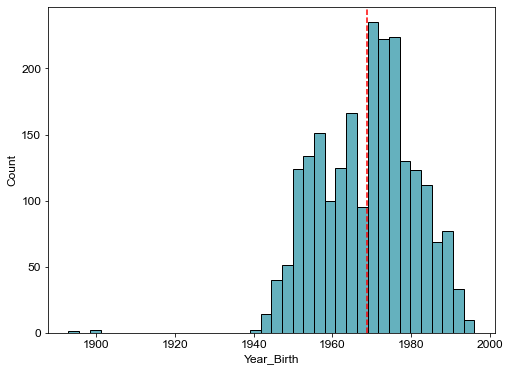

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Year_Birth'], color='#3297a8')
plt.axvline(df['Year_Birth'].mean(), color='red', linestyle='--')

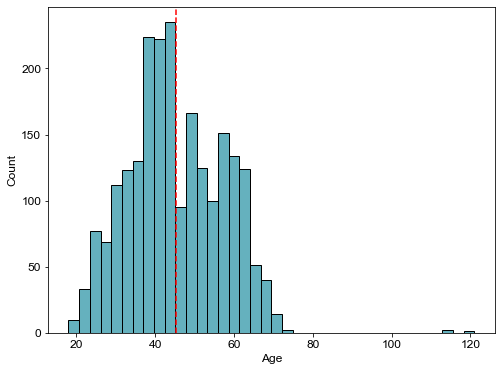

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Age'], color='#3297a8')
plt.axvline(df['Age'].mean(), color='red', linestyle='--')

In [94]:
df = df[df.Age < 100]

با بررسی تاریخ تولد مشتریانی که از فروشگاه خرید انجام داده اند متوجه میشویم که بخش بزرگتر مشتریان در بازه ی 30 تا 60 سال قرار دارند اما مشتریانی هم هستند که بالای صد سال سن دارند و ما این موضوع را به عنوان یک داده ی ناهمگون در نظر میگیریم و این تعداد مشتریان بالای 100 سال را حذف میکنیم.

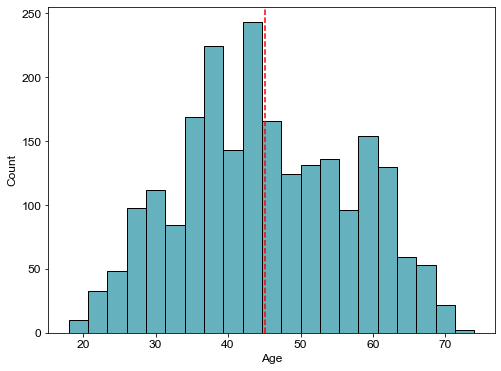

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Age'], color='#3297a8')
plt.axvline(df['Age'].mean(), color='red', linestyle='--')

<AxesSubplot:>

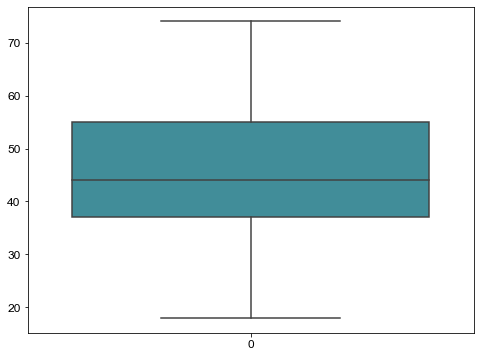

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Age'], color='#3297a8')

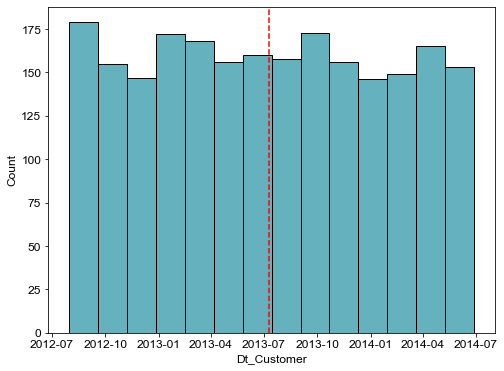

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Dt_Customer'], color='#3297a8')
plt.axvline(df['Dt_Customer'].mean(), color='red', linestyle='--')

همچنین با توجه به زمان ثبت نام مشتریان متوجهه میشویم که تفاوت چندانی در زمان  ثبت نام ان ها وجود ندارد. داده های جمع آوری شده در دیتاست نشان میدهد که اطاعات مربوط به مشتریانی است که در بازه ماه جولای سال 2012 تا جولای 2014 ثبت نام شده اند.

In [98]:
df.describe(include=object)

,Education,Marital_Status,Country
count,2237,2237,2237
unique,5,8,8
top,Graduation,Married,SP
freq,1127,864,1094


In [99]:
country_group = df.groupby('Country')['ID'].count().reset_index().rename(columns = {'ID': 'count'})

<AxesSubplot:xlabel='Country', ylabel='count'>

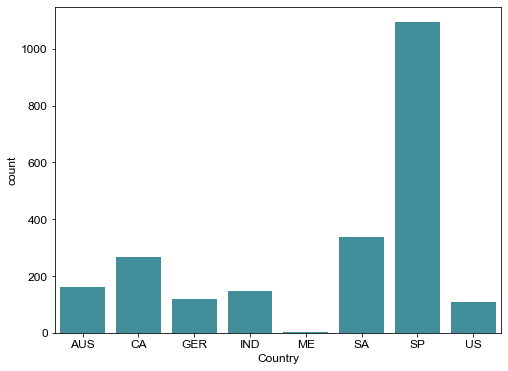

In [100]:
plt.figure(figsize=(8, 6))
sns.barplot(data=country_group, x='Country', y='count', color='#3297a8')

بیشترین مشتریان این فروشگاه از کشور اسپانیا، افریقای جنوبی و کانادا هستند. در رده های بعدی کشورهای استرالیا، آلمان، هند و ایالات متحده نیز قرار دارند.

In [101]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [102]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x=='YOLO' else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x=='Alone' else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x=='Widow' else x)
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x=='Divorced' else x)
df = df[df.Marital_Status != 'Absurd']

In [103]:
df['Marital_Status'].value_counts()

Married     864
Single      792
Together    579
Name: Marital_Status, dtype: int64

وضعیت تاهل مشتریان در هشت حالت دسته بندی شده اند، این هشت دسته را میتوان در سه دسته کلی خلاصه کرد، چرا که دسته های تنها، تو فقط یک بار زندگی خواهی کرد و ... همه بیانگر وضعیت تنها هستند از همین رو تمام این دسته ها را به سه وضعیت ازدواج کرده، همراه با پارتنر و تنها تبدیل میکنیم

In [104]:
df['family_mem'] = df['Marital_Status'].apply(lambda x: 1 if x=='Single' else 2)
df['family_mem'] = df['Teenhome'] + df['Kidhome'] + df['family_mem']

<AxesSubplot:xlabel='family_mem', ylabel='Count'>

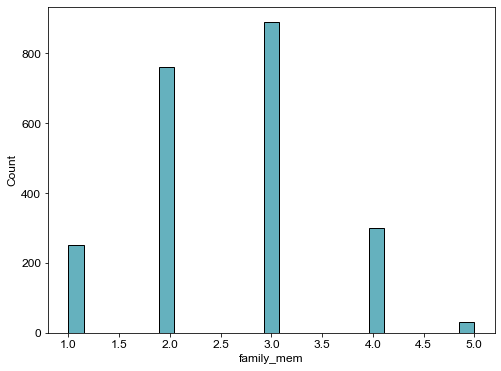

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['family_mem'], color='#3297a8')

با شمارش تعداد بچه ها و نوجوانان در خانواده و همچین تعداد سرپرستان این بچه ها تعداد افراد خانواده قابل محاسبه است.

<AxesSubplot:ylabel='Income'>

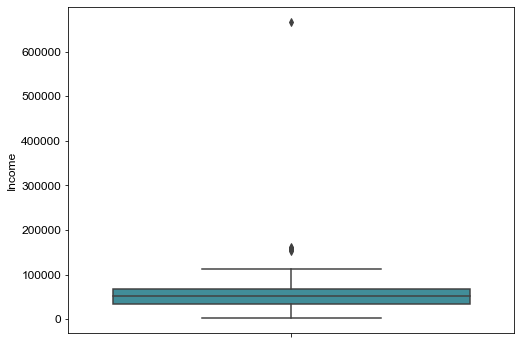

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = df['Income'], color='#3297a8')

In [107]:
df = df[df.Income < 600000]

در مرحله بعد با مشاهده وضعیت درآمد سالیانه خانوار متوجه میشویم که تعداد اندکی از مشتریان درامد سالانه بیش از 600000 دلار دارند که یا اشتباه شده است یا اینکه به شدت پولدار هستند که در هر دو حالت توازن داده های ما را به هم زده اند و این افراد را از دیتاست حذف میکنیم

<AxesSubplot:ylabel='Income'>

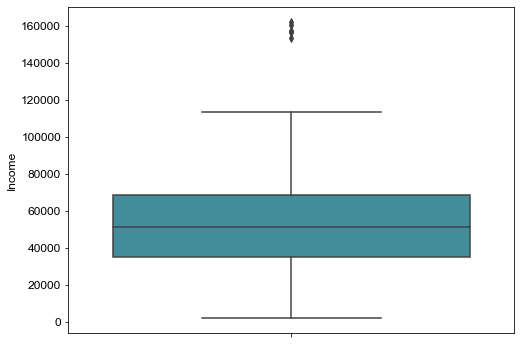

In [108]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = df['Income'], color='#3297a8')

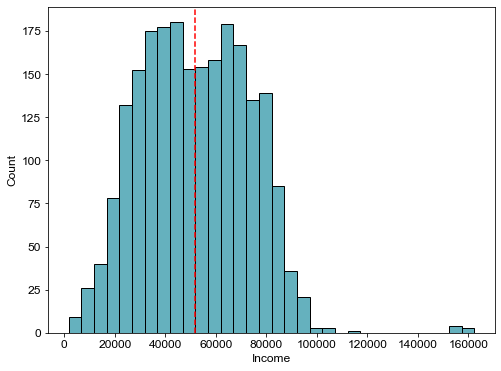

In [109]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df.Income, color='#3297a8')
plt.axvline(df.Income.mean(), color='r', linestyle='--')

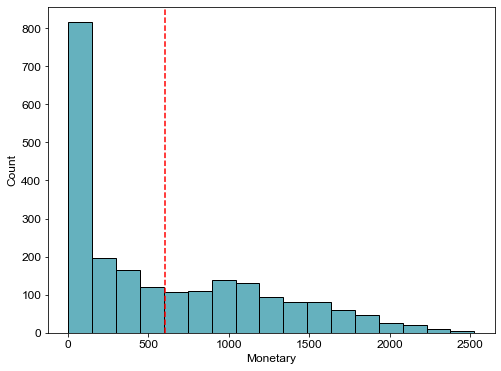

In [110]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df.Monetary, color='#3297a8')
plt.axvline(df.Monetary.mean(), color='r', linestyle='--')

قابل مشاهده است که توزیع درامد سالانه و میزان مخارج خانوارها در این فروشگاه بازه دوساله پوشش داده شده در دیتاست چگونه است، به طوری که میانگین درامد سالانه مشتریان پنجاه هزار دلار و میانگین مخارج آن ها در این فروشگاه در حدود 600 دلار است.

<Figure size 720x432 with 0 Axes>

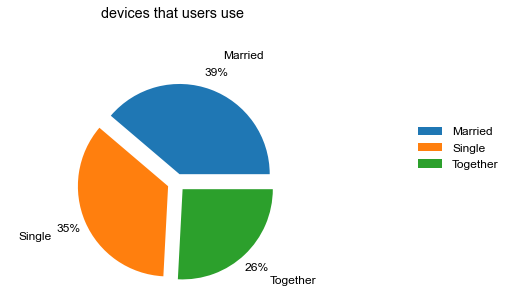

In [111]:
plt.figure(figsize=(10, 6))
marital = pd.DataFrame(df.groupby('Marital_Status').agg(
    count = ('ID', 'count'),
    perc = ('ID', lambda x: len(x)/len(df))
)).reset_index()

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
labels = ['Married', 'Single', 'Together']

explode=(0.1,0.1, 0.1)
ax.pie(marital['perc'], explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("devices that users use \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

وضعیت زندگی مشتریان نیز پس از تغییراتی که در ابتدا به وجود اوردیم بدین گونه است که مشاهده میکنید. تفاوت چندانی بین سه گروه وجود ندارد و تقریبا به یک اندازه تقسیم شده اند، و فقط گروهی که با پارتنر خود زندگی میکنند کمی کمتر هستند.

<Figure size 720x432 with 0 Axes>

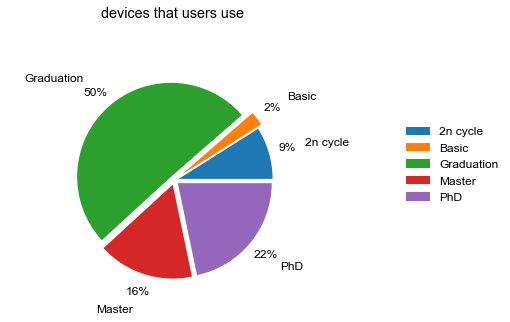

In [112]:
plt.figure(figsize=(10, 6))
education = pd.DataFrame(df.groupby('Education').agg(
    count = ('ID', 'count'),
    perc = ('ID', lambda x: len(x)/len(df))
)).reset_index()

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
labels = ['2n cycle', 'Basic', 'Graduation', 'Master', 'PhD']

explode=(0.05, 0.1, 0.05, 0.05, 0.05)
ax.pie(education['perc'], explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("devices that users use \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

با بررسی میزان پراکندگی انواع تحصیلات در بین مشتریان متوجه میشویم که بیش از نیمی از مشتریان فروشگاه دارای تحصیلات دانشگاهی نیستند و بعد از این افراد بالاترین میزان تحصیلات برای افراد با درجه پی اچ دی با 22 درصد است

<AxesSubplot:xlabel='family_mem', ylabel='Count'>

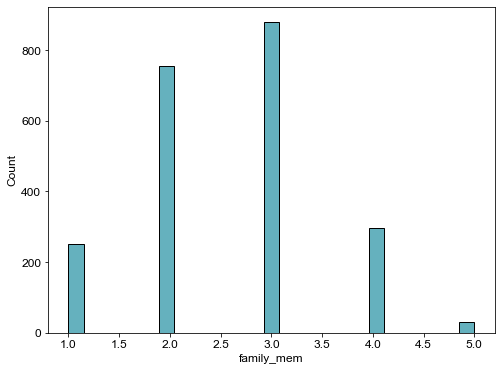

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['family_mem'], color='#3297a8')

با توجه با تعداد اعضای خانواده متوجه میشویم که بخش زیادی از مشتریان دارای یک فرزند هستند و صرف نظر از زوج هایی که تنها زندگی میکنند، خانواده های سه نفره و سپس 4 نفره بیش ترین بخش مشتریان را تشکیل میدهند

در ادامه برای ایجاد دید عمیق تر از وضعیت خریدهایی که مشتریان از این فروشگاه میکنند از تحلیل آر اف ام استفاده میکنیم تا با استفاده از تعداد خریدهای مشتریان و میزان پولی که در این خریدها خرج کرده اند به همراه فاصله از اخرین روزی که از فروشگاه خرید کرده اند، مشتریان را دسته بندی کنیم

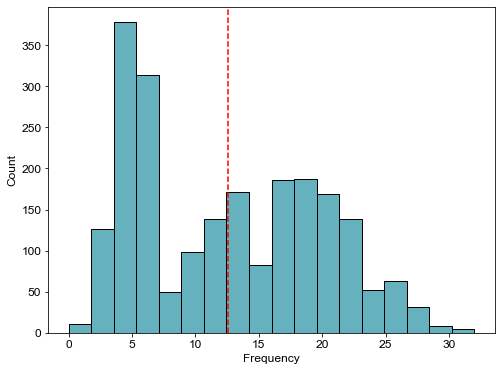

In [114]:
# Total number of purchases
df['Frequency'] = df.iloc[:, 16:19].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.histplot(data=df.Frequency, color='#3297a8')
plt.axvline(df.Frequency.mean(), color='r', linestyle='--')

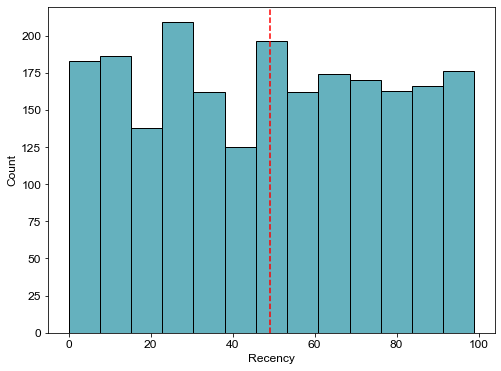

In [115]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df.Recency, color='#3297a8')
plt.axvline(df.Recency.mean(), color='r', linestyle='--')

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

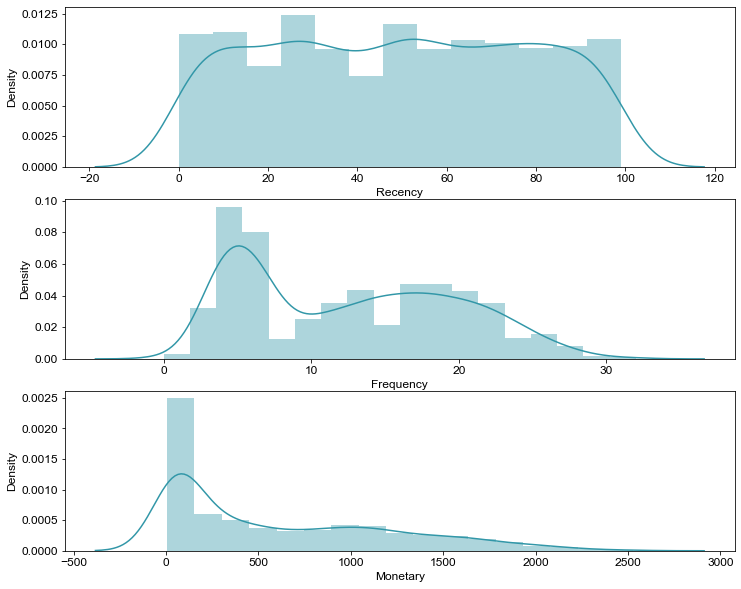

In [116]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['Recency'], color='#3297a8')
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['Frequency'], color='#3297a8')
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['Monetary'], color='#3297a8')
# Show the plot
plt.show()

همان طور که مشاهده میکنید، الان فیچرهای تعداد خریدهی هر مشتری، ارزش خریدهای انجام شده و فاصله از اخرین خرید را در اختیار داریم. کاری که اینجا قصد داریم انجام بدهیم دسته بندی بندی مشتریان بر اساس این سه ویژگی است، در واقع این دسته بندی این امکان را به ما میدهند که نوع رفتار مشتری را تا حدودی دسته بندی کنیم، کاری که میتواند دید خیلی خوبی بر اساس این سه فیچر به  تصمیم گیرندگان بدهد

In [117]:
# use only the necessary columns
rfm = df[['ID', 'Recency', 'Frequency', 'Monetary']]
# recency quartile segmentation
r_labels = range(4, 0, -1)
recency = rfm['Recency']
r_quartiles, bins = pd.qcut(recency, 4, labels=r_labels, retbins=True)
rfm = rfm.assign(R=r_quartiles.values)

# frequency quartile segmentation
f_labels = range(1, 5)
frequency = rfm['Frequency'].rank(method='first') # rank to deal with duplicate values
f_quartiles, bins = pd.qcut(frequency, 4, labels=f_labels, retbins=True)
rfm = rfm.assign(F = f_quartiles.values)

# monetary value quartile segmentation
m_labels = range(1, 5)
monetary = rfm['Monetary']
m_quartiles, bins = pd.qcut(monetary, 4, labels=m_labels, retbins=True)

rfm = rfm.assign(M = m_quartiles.values)

# show 5 samples of the newly created scores
rfm.sample(5)

,ID,Recency,Frequency,Monetary,R,F,M
341,4609,14,15,486,4,3,3
584,2849,25,24,1180,3,4,4
2205,8070,98,11,264,1,2,2
1931,9209,85,23,1564,1,4,4
1798,2952,80,6,76,1,2,2


با توجه به اینکه واحد اندازه گیری این معیارها یک سان نیستند، هر کدوم از این فیچرها را به 4 دسته تقسیم میکنیم تا در هر کدام از معیارها 4 دسته کلی از مشتریان داشته باشیم

In [118]:
# Build RFM Segment and RFM Score
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm['segment'] = rfm.apply(join_rfm, axis=1)
rfm['score'] = rfm[['R','F','M']].sum(axis=1)
# show 5 samples
rfm.sample(5)

,ID,Recency,Frequency,Monetary,R,F,M,segment,score
1000,6201,45,5,49,3,1,1,311,5
1645,4252,73,11,301,2,2,2,222,6
1295,2683,56,22,910,2,4,3,243,9
638,8486,27,13,367,3,3,2,332,8
692,10699,30,6,92,3,2,2,322,7


روش های متفاوتی برای محاسبه یا دسته بندی مشتریان وجود دارد، یکی از این روش ها جمع کردن ارزش خانه های آر، اف و ام است، که با توجه به ارزشی که هر کدام از این خانه ها میتوانند به خود بگیرند (بین 1 تا 4)، امتیاز محاسبه شده بین 3 تا 12 قرار میگیرد. راه دیگر کنار هم قرار دادن ارزش این سه معیار است که یک عدد سه رقمی بین 111 تا 444 را تشکیل میدهد این روش کمک میکند تا در واقع نوعی دسته بندی را به وجود اوریم که در یک محیط سه بعدی بر روی محورهای آر، ام و اف به وجود می آید

In [119]:
# Define rfm_level function
def rfm_level(df):
    if df['score'] >= 11:
        return 'Can\'t Loose Them'
    elif ((df['score'] >= 9) and (df['score'] < 11)):
        return 'Champions'
    elif ((df['score'] >= 7) and (df['score'] < 9)):
        return 'Loyal'
    elif ((df['score'] >= 5) and (df['score'] < 7)):
        return 'Potential'
    elif ((df['score'] >= 3) and (df['score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,ID,Recency,Frequency,Monetary,R,F,M,segment,score,RFM_Level
0,1826,0,14,1190,4,3,4,434,11,Can't Loose Them
1,1,0,17,577,4,3,3,433,10,Champions
2,10476,0,10,251,4,2,2,422,8,Loyal
3,1386,0,3,11,4,1,1,411,6,Potential
4,5371,0,6,91,4,1,2,412,7,Loyal


ما هر دو نوع امتیازی و قسمت بندی را بر روی نتایج سه معیار پیاده کردیم ولی انتخاب میکنیم که از امتیاز هایی که بر اساس جمع کردن ارزش سه معیار محاسبه شده است پیش برویم، این روش ممکن است باعث شود تا مشتریانی هم امتیاز شوند که برای مثال از نظر ما خیلی یکسان نباشند برای جلوگیری از این کار میتوان به هر یک از سه معیار یک ضریب اهمیت اضافه کرد تا از این طریق میزان اهمیت هر یک از این معیارها به ارزش های مد نظر ما نزدیکتر باشد، فعلا در این پروژه قصد چنین کاری را نداریم و با روش سنتی پیش میرویم

In [120]:
# Adding RFM levels to the dataset (df)
df = pd.concat([df, rfm['RFM_Level']], axis=1)

In [121]:
# Adding Income to rfm table
rfm = pd.concat([rfm, df['Income']], axis=1)

In [122]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary      
                    mean      mean     mean count
RFM_Level                                        
Can't Loose Them    18.9      21.2   1338.9   280
Champions           50.1      19.0   1110.7   551
Loyal               50.3      12.3    513.0   546
Needs Attention     76.2       4.2     40.6   256
Potential           49.4       6.1    110.1   577

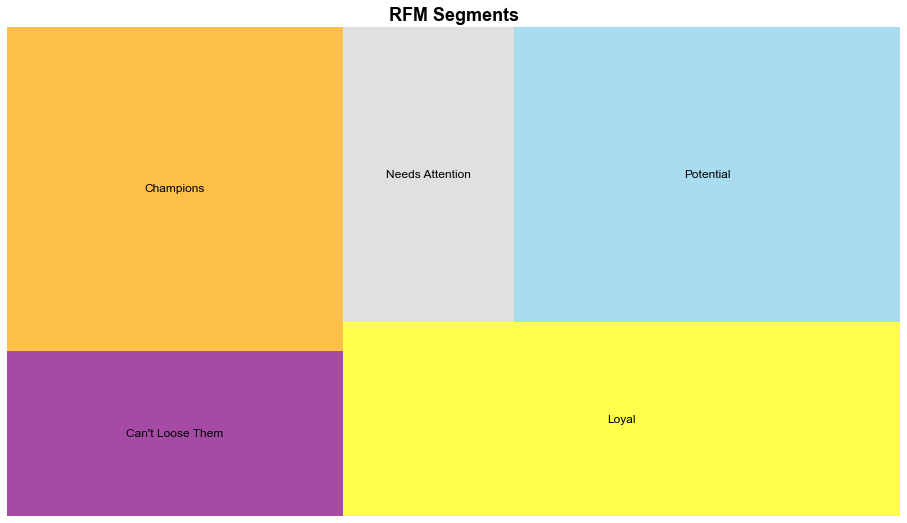

In [123]:
import squarify

# rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.7,
                     color=['purple', 'orange', 'yellow', 'lightgrey', 'skyblue', 'lightgreen'] )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

<Figure size 720x432 with 0 Axes>

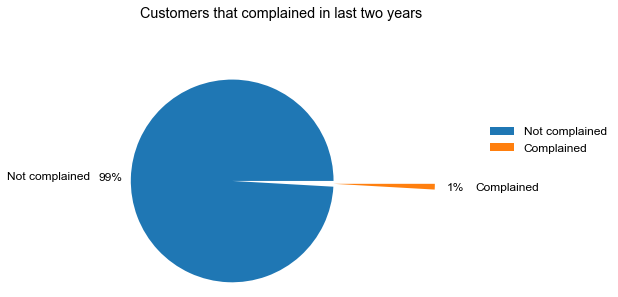

In [124]:
plt.figure(figsize=(10, 6))
complain = pd.DataFrame(df.groupby('Complain').agg(
    count = ('ID', 'count'),
    perc = ('ID', lambda x: len(x)/len(df))
)).reset_index()

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=12
labels = ['Not complained', 'Complained']

explode=(0, 1)
ax.pie(complain['perc'], explode=explode, labels=labels,  
       autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Customers that complained in last two years \n\n\n")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

قسمت بندی مشتریان فروشگاه باعث میشود تا مشتریان به 5 دسته تقسیم شوند، پایین ترین دسته مربوط به مشتریانی هستند که نیاز به توجه بیشتری دارند، در قسمت های بعدی خواهیم دید که وضعیت هر کدام از مشتریان از لحاظ های درامد و غیره چگونه است اما صرفا با توجه به امتیازی که این دسته دارد میتوان تصور کرد که با توجه به اینکه تعداد خیلی کمی از مشتریان در دو سال گذشته شکایتی داشته اند، میتوان تصور کرد که این مشتریان از لحاظ سطح توانایی برای خرید از فروشگاه دچار مشکل هستند و اگر بخواهیم آن ها را به نوعی بیشتر علاقه مند کنیم باید بتوانیم طرح هایی برای حمایت از مشتریان خود به اجرا بگذاریم تا بتوانیم این قسمت از مشتریان را به خرید بیشتر تشویق کنیم
دسته بعدی آن هایی هستند که دارای پتانسیل هستند و در واقع بیشتر از دسته قبلی از فروشگاه خرید میکنند، و ارزش خریدهای بالاتری هم دارند، در مراحل بعدی مشتریان وفادار و قهرمان را داریم که به طور میانگین هر 50 روز خریدی را در فروشگاه ثیت میکنند و تفاوت اصلی این دو گروه با یکدیگر در تعداد خریدها و ارزش آن ها هستند به طوری که مشتریان قهرمان به طور میانگین ارزش خریدهایشان دو برابر بیشتر از مشتریان وفادار است. و در مرحله اخر مشتریانی هستند که ارزش بالایی برای فروشگاه دارند، این مشتریان به وطر میانگین هر 18 روز ثبت خرید میکنند و ارزش خرید بسیار بالایی از خود ثبت کرده اند

In [125]:
marital_stat_agg = df.groupby('Marital_Status').agg(
    count=('ID', 'count'),
    Income_mean = ('Income', 'mean'),
    Income_std = ('Income', 'std'),
    Monetary_mean = ('Monetary', 'mean'),
    Monetary_std = ('Monetary', 'std'),
    Recency_mean = ('Recency', 'mean'),
    Recency_std = ('Recency', 'std'),
).reset_index()

<AxesSubplot:xlabel='RFM_Level', ylabel='Income'>

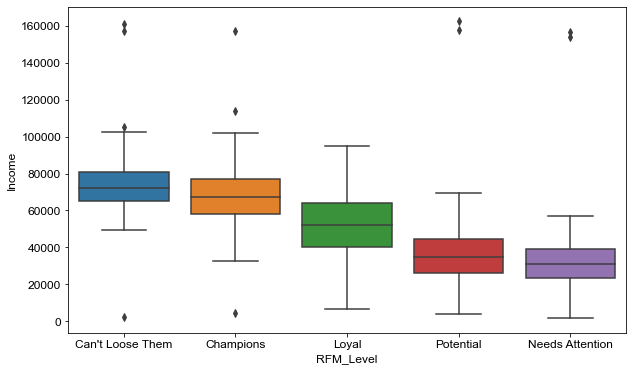

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm, x='RFM_Level', y='Income')

مقایسه میزان درآمد سالیانه خانوارها در سطوح مختلفی که برای آن ها به دست آوردیم نتایج جالبی به ما میدهد، میتوانیم ببینیم که در واقع این مشتریان در مرحله اول در میزان درآمد سالیانه خود متفاوت هستند و همین مسئله یکیاز علل قرار گرفتن آن ها در دسته های مختلف است، اما قابل توجه است که دسته قهرمان ها و دسته مشتریانی که نمیخواهیم از دستشان بدهیم و همچنین آن هایی که نیاز به توجه دارند و همچنین آن هایی که پتانسیل دارند، در کنار اینکه از لحاظ رفتاری متفاوت هستند و این مسئله را پیش تر مشاهده کردیم، از لحاظ درآمدی تفاوت چندانی ندارند و از آن جایی که این مشتریان نمونه ای از جامعه کلی مشتریان ما هستند. به همین منظور برای اطمینان از اینکه واقعا با یکدیگر متفاوت هستند، از روش تی تست استفاده میکنیم تا اطمینان حاصل کنیم

In [127]:
from scipy import stats


cantloose_champs = stats.ttest_ind(rfm[rfm['RFM_Level']=="Can't Loose Them"]['Income'], rfm[rfm['RFM_Level']=="Champions"]['Income'])
pot_atten = stats.ttest_ind(rfm[rfm['RFM_Level']=="Potential"]['Income'], rfm[rfm['RFM_Level']=="Needs Attention"]['Income'])

if cantloose_champs[1] <= 0.05: 
    print('p-value between Graduation & phd: ', cantloose_champs[1])
    print('reject H0: not equal')
else: 
    print('p-value between Graduation & phd: ', cantloose_champs[1])
    print('accept H0: equal')

if pot_atten[1] <= 0.05: 
    print('p-value between phd & 2nd cycle: ', pot_atten[1])
    print('reject H0: not equal')
else: 
    print('p-value between phd & 2nd cycle: ', pot_atten[1])
    print('accept H0: equal')


p-value between Graduation & phd:  2.526332157088656e-09
reject H0: not equal
p-value between phd & 2nd cycle:  0.0008048858774030267
reject H0: not equal


طبیعتا در فرض اچ 0 تصور ما این است که گروه قهرمانان و آن ها که نمیخواهیم از دستشان بدهیم از لحاظ میانگین درآمد مساوی هستند و فرض اچ 1 مطرح میکند که این مقادیر یکسان نیستند، با پیاده سازی تی تست نتایج از سطح اطمینان 5 درصد کمتر هستند و فرض اچ صفر رد میشود، این مراحل برای مشتریان دارای پتانسیل و آنهایی که نیاز به توجه دارند هم انجام میشود و در نتیجه متوجه میشویم که در هر دو حالت با اینکه میانگین نزدیکی دارند، اما درآمد این گروه ها مساوی نیستند

<AxesSubplot:xlabel='RFM_Level', ylabel='Monetary'>

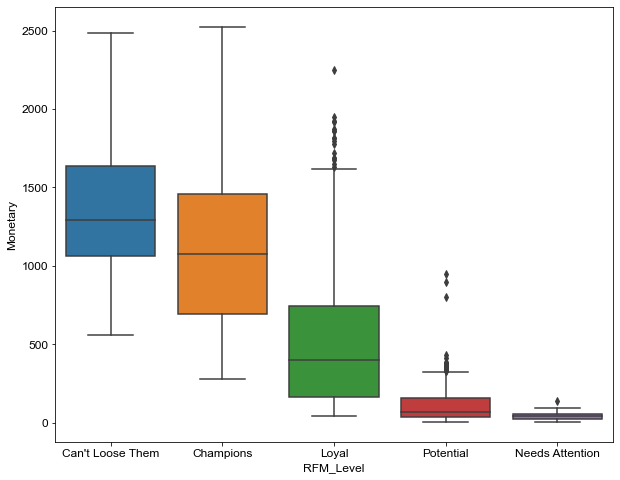

In [128]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=rfm, x='RFM_Level', y='Monetary')

میزان خرج و مخارج گروه های مختلف مشتریان نیز در این نمدار قابل مشاهده است و آنچه مشخص است با توجه به میزان درآمد هر کدام از این گروه میتوانیم بگوییم که آنچه از مقایسه میزان مخارج مشتریان در گروه های مختلف میبینیم منطقی به نظر میرسد

<AxesSubplot:xlabel='Education', ylabel='Income'>

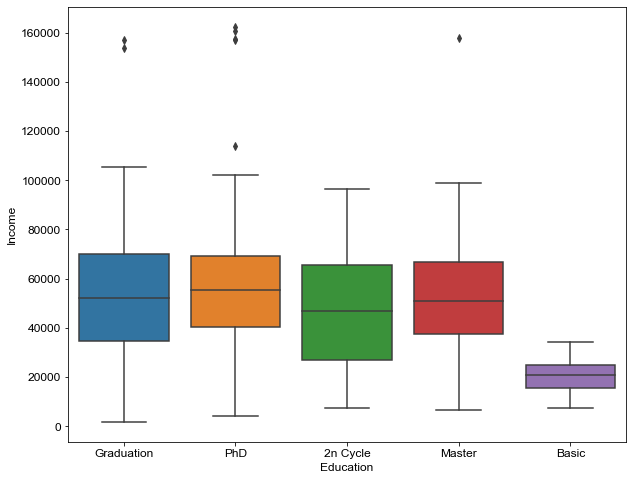

In [129]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Education', y='Income')

In [130]:
grad_phd = stats.ttest_ind(df[df['Education']=="Graduation"]['Income'], df[df['Education']=="PhD"]['Income'])
phd_2nd = stats.ttest_ind(df[df['Education']=="PhD"]['Income'], df[df['Education']=="2n Cycle"]['Income'])
master_phd = stats.ttest_ind(df[df['Education']=="Master"]['Income'], df[df['Education']=="PhD"]['Income'])
second_grad = stats.ttest_ind(df[df['Education']=="2n Cycle Education"]['Income'], df[df['Education']=="Graduation"]['Income'])
master_grad = stats.ttest_ind(df[df['Education']=="Master"]['Income'], df[df['Education']=="Graduation"]['Income'])
second_master = stats.ttest_ind(df[df['Education']=="2n Cycle"]['Income'], df[df['Education']=="Master"]['Income'])


if grad_phd[1] <= 0.05: 
    print('p-value between Graduation & phd: ', grad_phd[1])
    print('reject H0: not equal')
else: 
    print('p-value between Graduation & phd: ', grad_phd[1])
    print('accept H0: equal')

if phd_2nd[1] <= 0.05: 
    print('p-value between phd & 2nd cycle: ', phd_2nd[1])
    print('reject H0: not equal')
else: 
    print('p-value between phd & 2nd cycle: ', phd_2nd[1])
    print('accept H0: equal')

if second_master[1] <= 0.05: 
    print('p-value between master & 2nd cycle: ', second_master[1])
    print('reject H0: not equal')
else: 
    print('p-value between master & 2nd cycle: ', second_master[1])
    print('accept H0: equal')

if master_phd[1] <= 0.05: 
    print('p-value between phd & master: ', master_phd[1])
    print('reject H0: not equal')
else: 
    print('p-value between phd & master: ', master_phd[1])
    print('accept H0: equal')

if master_grad[1] <= 0.05: 
    print('p-value between master & grad: ', master_grad[1])
    print('reject H0: not equal')
else: 
    print('p-value between master & grad: ', master_grad[1])
    print('accept H0: equal')

if second_grad[1] <= 0.05: 
    print('p-value between 2n cycle & Grad: ', second_grad[1])
    print('reject H0: not equal')
else: 
    print('p-value between 2n cycle & Grad: ', second_grad[1])
    print('accept H0: equal')

p-value between Graduation & phd:  0.0006456921537410908
reject H0: not equal
p-value between phd & 2nd cycle:  2.4370531013102423e-06
reject H0: not equal
p-value between master & 2nd cycle:  0.0045676386475780074
reject H0: not equal
p-value between phd & master:  0.024144119755223556
reject H0: not equal
p-value between master & grad:  0.5620535809402293
accept H0: equal
p-value between 2n cycle & Grad:  nan
accept H0: equal


با مقایسه درآمد بین مشتریان با تحصیلات مختلف نیز نتایج جالبی به دست می آید، به طور کلی درامد مشتریان با تحصیلات گرد و دوره دومی یکسان است و تفاوت چندانی ندارد، همچنین تفاوت زیادی بین دانشجویان گرد و ارشد از لاظ درامد نیست. در واقع دوره دوم نوعی از درجه تحصیلات در اروپا است که شباهت زیادی به دوره ارشد دارد و در واقع یکسان بودن این دو گروه با تحصیلات گرد از لحاظ درامدی منطقی به نظر میرسد

<AxesSubplot:xlabel='Education', ylabel='Monetary'>

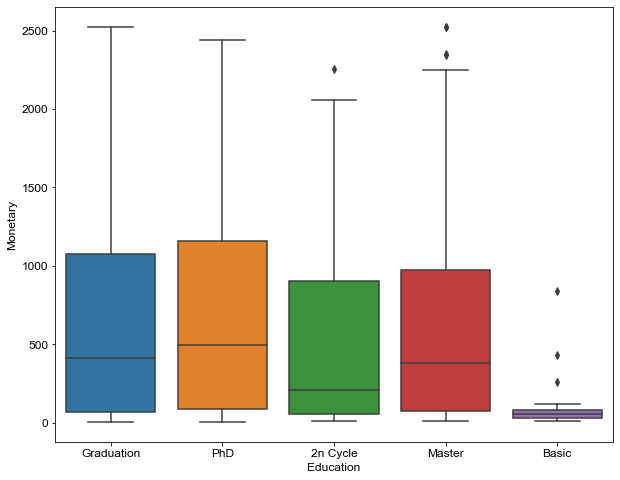

In [131]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Education', y='Monetary')

In [132]:
grad_phd = stats.ttest_ind(df[df['Education']=="Graduation"]['Monetary'], df[df['Education']=="PhD"]['Monetary'])
master_phd = stats.ttest_ind(df[df['Education']=="Master"]['Monetary'], df[df['Education']=="PhD"]['Monetary'])
master_grad = stats.ttest_ind(df[df['Education']=="Master"]['Monetary'], df[df['Education']=="Graduation"]['Monetary'])

if grad_phd[1] <= 0.05: 
    print('p-value between Graduation & phd: ', grad_phd[1])
    print('reject H0: not equal')
else: 
    print('p-value between Graduation & phd: ', grad_phd[1])
    print('accept H0: equal')
    
if master_grad[1] <= 0.05: 
    print('p-value between master & Graduation: ', master_grad[1])
    print('reject H0: not equal')
else: 
    print('p-value between master & Graduation: ', master_grad[1])
    print('accept H0: equal')

if master_phd[1] <= 0.05: 
    print('p-value between master & PhD: ', master_phd[1])
    print('reject H0: not equal')
else: 
    print('p-value between master & PhD: ', master_phd[1])
    print('accept H0: equal')

p-value between Graduation & phd:  0.11125485562274881
accept H0: equal
p-value between master & Graduation:  0.7138943551602066
accept H0: equal
p-value between master & PhD:  0.1255274024881919
accept H0: equal


با مقایسه میزان تفاوت مخارج گروه ها با یک دیگر نیز متوجه میشویم که سه گروه گرد، مستر و پی اچ در از لحاظ مخارج شبیه به هم هستند و میانگین نزدیکی دارند با پیاده سازی تی تست نیز این فرض ما به یقین تبدیل میشود و مطمئن میشویم که میانگین مخارج یکسانی برای این سه گروه وجود دارد

In [133]:
rfm['RFM_Level'].unique()

array(["Can't Loose Them", 'Champions', 'Loyal', 'Potential',
       'Needs Attention'], dtype=object)

<AxesSubplot:xlabel='Marital_Status', ylabel='Monetary'>

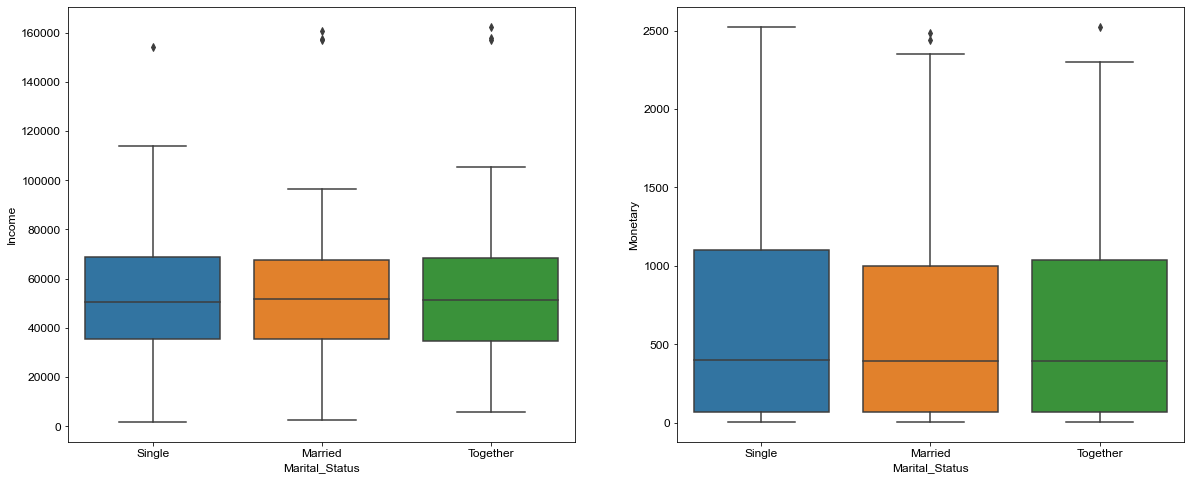

In [134]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.boxplot(data=df, x='Marital_Status', y='Income')
plt.subplot(122)
sns.boxplot(data=df, x='Marital_Status', y='Monetary')

In [135]:
single_married = stats.ttest_ind(df[df['Marital_Status']=="Single"]['Income'], df[df['Marital_Status']=="Married"]['Income'], alternative="two-sided")
married_together = stats.ttest_ind(df[df['Marital_Status']=="Married"]['Income'], df[df['Marital_Status']=="Together"]['Income'], alternative="two-sided")
single_together = stats.ttest_ind(df[df['Marital_Status']=="Single"]['Income'], df[df['Marital_Status']=="Together"]['Income'], alternative="two-sided")

if single_married[1] <= 0.05: 
    print('p-value between Single & Married Income: ', single_married[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Married Income: ', single_married[1])
    print('accept H0: equal')

if married_together[1] <= 0.05: 
    print('p-value between Married & Together Income: ', married_together[1])
    print('reject H0: not equal')
else: 
    print('p-value between Married & Together Income: ', married_together[1])
    print('accept H0: equal')

if single_together[1] <= 0.05: 
    print('p-value between Single & Together Income: ', single_together[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Together Income: ', single_together[1])
    print('accept H0: equal')


single_married = stats.ttest_ind(df[df['Marital_Status']=="Single"]['Monetary'], df[df['Marital_Status']=="Married"]['Monetary'], alternative="two-sided")
married_together = stats.ttest_ind(df[df['Marital_Status']=="Married"]['Monetary'], df[df['Marital_Status']=="Together"]['Monetary'], alternative="two-sided")
single_together = stats.ttest_ind(df[df['Marital_Status']=="Single"]['Monetary'], df[df['Marital_Status']=="Together"]['Monetary'], alternative="two-sided")

if single_married[1] <= 0.05: 
    print('p-value between Single & Married Monetary: ', single_married[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Married Monetary: ', single_married[1])
    print('accept H0: equal')

if married_together[1] <= 0.05: 
    print('p-value between Married & Together Monetary: ', married_together[1])
    print('reject H0: not equal')
else: 
    print('p-value between Married & Together Monetary: ', married_together[1])
    print('accept H0: equal')

if single_together[1] <= 0.05: 
    print('p-value between Single & Together Monetary: ', single_together[1])
    print('reject H0: not equal')
else: 
    print('p-value between Single & Together Monetary: ', single_together[1])
    print('accept H0: equal')

p-value between Single & Married Income:  0.7619964439689076
accept H0: equal
p-value between Married & Together Income:  0.7357931662520532
accept H0: equal
p-value between Single & Together Income:  0.9518985464009531
accept H0: equal
p-value between Single & Married Monetary:  0.2910223454591433
accept H0: equal
p-value between Married & Together Monetary:  0.6171391831944478
accept H0: equal
p-value between Single & Together Monetary:  0.6506468819110847
accept H0: equal


با چک کردن دسته های مختلفی که برای وضعیت تاهل وجود دارد متوجه میشویم که تفاوت زیادی بین درامد و مخارج این گروه ها نیست

<AxesSubplot:xlabel='family_mem', ylabel='Monetary'>

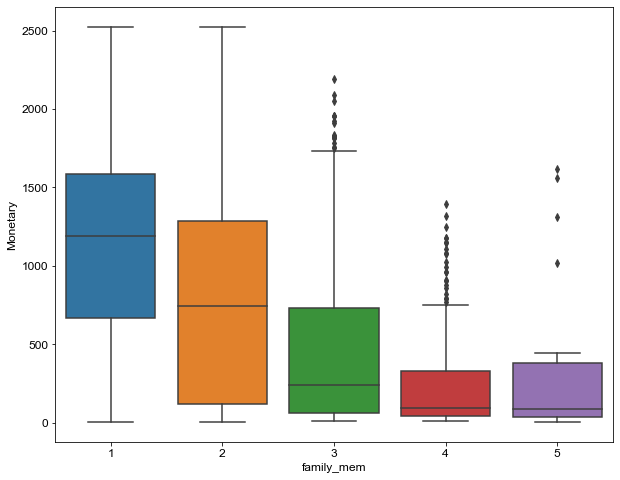

In [136]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='family_mem', y='Monetary')

In [137]:
four_five = stats.ttest_ind(df[df['family_mem']==4]['Monetary'], df[df['family_mem']==5]['Monetary'], alternative="two-sided")
three_four = stats.ttest_ind(df[df['family_mem']==3]['Monetary'], df[df['family_mem']==4]['Monetary'], alternative="two-sided")
# married_together = stats.ttest_ind(df[df['family_mem']=="Married"]['Monetary'], df[df['family_mem']=="Together"]['Monetary'], alternative="two-sided")

if four_five[1] <= 0.05: 
    print('p-value between families with 4 members and 5 members: ', four_five[1])
    print('reject H0: not equal')
else: 
    print('p-value between families with 4 members and 5 members: ', four_five[1])
    print('accept H0: equal')

if three_four[1] <= 0.05: 
    print('p-value between families with 3 members and 4 members: ', three_four[1])
    print('reject H0: not equal')
else: 
    print('p-value between families with 3 members and 4 members: ', three_four[1])
    print('accept H0: equal')


p-value between families with 4 members and 5 members:  0.37556951501241087
accept H0: equal
p-value between families with 3 members and 4 members:  3.3556310208894926e-11
reject H0: not equal


از لحاظ مخارج نیز به نظر میرسد وقتی اعضای خانواده افزایش میابد، میزان مخارجی که از فروشگاه ما تامین میشود کاهش میابد این مسئله میتواند به این دلیل باشد که نیازهای این خانواده ها در فروشگاه ما تامین نمیشود و یا اینکه به صورت کلی توانایی خانواده برای خرید کاهش میابد

<AxesSubplot:xlabel='family_mem', ylabel='Count'>

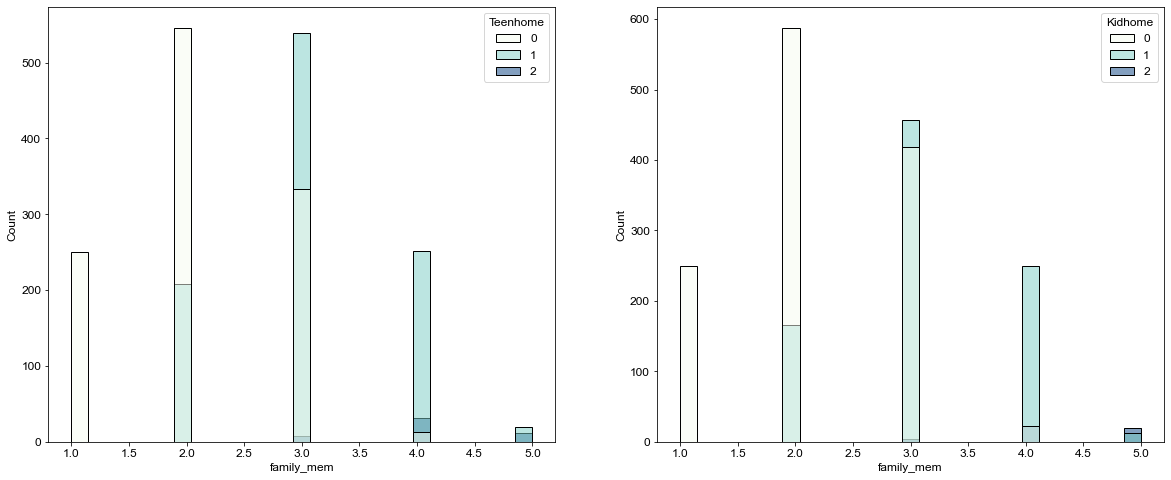

In [138]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df, x='family_mem', hue='Teenhome', palette='GnBu')
plt.subplot(122)
sns.histplot(data=df, x='family_mem', hue='Kidhome', palette='GnBu')

<AxesSubplot:xlabel='Teenhome', ylabel='Monetary'>

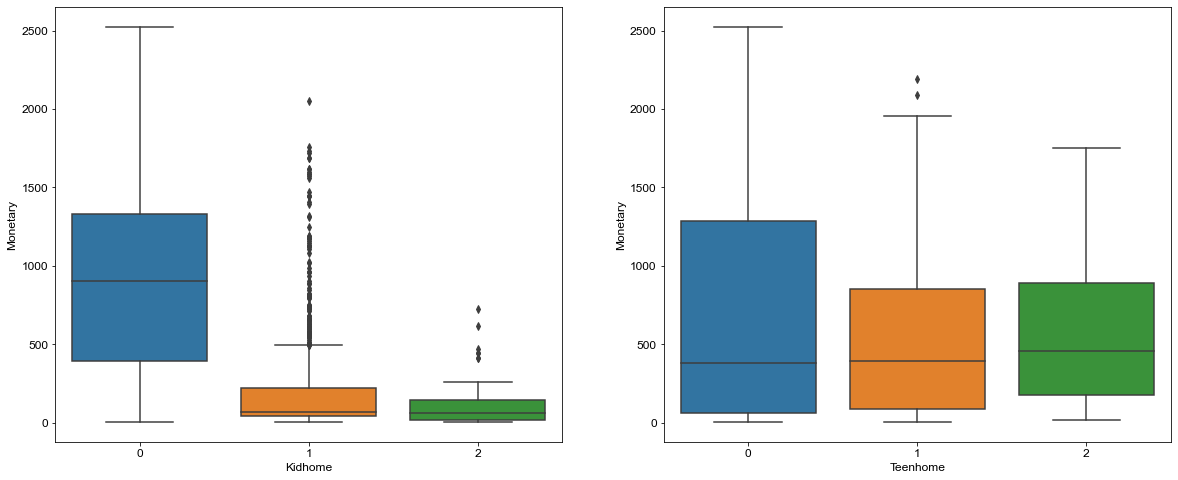

In [139]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.boxplot(data=df, x='Kidhome', y='Monetary')
plt.subplot(122)
sns.boxplot(data=df, x='Teenhome', y='Monetary')

<AxesSubplot:xlabel='RFM_Level', ylabel='Count'>

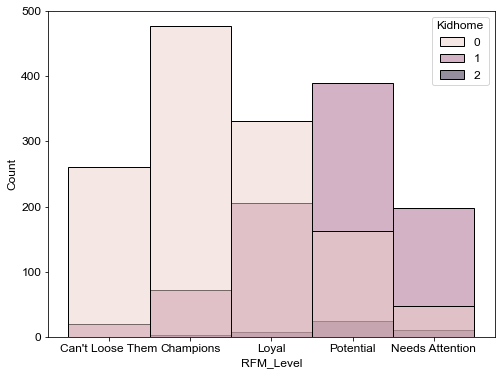

In [140]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='RFM_Level', hue='Kidhome')

آنچه که به نظر میرسد تفاوت اصلی در تعداد بچه های کوچک است نه در تعداد نوجوانان خانواده، به نظر میرسد که فروشگاه ما توانایی تامین نیازهای مناسب کودکان را ندارد و این مسئله در صورتی که حل شود میتواند کمک زیادی به فروش فروشگاه بکند. در واقع با تامین کالاهای مورد نیاز خانوارهایی که دارای کودک هستند میتوانیم در وهله اول فروش خوبی از خانوارهایی که در سه گروه اول از لحاظ دسته بند مشتریان قرار دارند به دست آوریم اما با اینحال دو دسته اول تعداد کمی از خانوارها هستند که دارای کودک باشند اما دلیل مهم تر این است که گروه های پایینی تعداد قابل ملا حظه ای از خانوارها دارای کودک هستند، با کمک به شرایط این خانوارها و تامین محصولات مورد نیازشان میتوانیم فروش مناسب و در کنار آن انتقال هدفمند این خانوارها را از دسته های پایینی به دسته های بالایی دسته بندی مشتریان محقق کنیم.

In [141]:
df['Kids'] = df['Kidhome'].apply(lambda x: 1 if x>=1 else 0)

contingency_table = pd.crosstab(df.RFM_Level, df.Kids) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

Kids                0    1
RFM_Level                 
Can't Loose Them  260   20
Champions         477   74
Loyal             332  214
Needs Attention    47  209
Potential         163  414


Kids,0,1
RFM_Level,,
Can't Loose Them,0.203284,0.021482
Champions,0.372948,0.079484
Loyal,0.259578,0.229860
Needs Attention,0.036747,0.224490
Potential,0.127443,0.444683


In [142]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Kids                0    1
RFM_Level                 
Can't Loose Them  260   20
Champions         477   74
Loyal             332  214
Needs Attention    47  209
Potential         163  414
dof=4
[[162.04524887 117.95475113]
 [318.88190045 232.11809955]
 [315.98823529 230.01176471]
 [148.15565611 107.84434389]
 [333.92895928 243.07104072]]
probability=0.950, critical=9.488, stat=700.237
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


با انجام یک تست کای اسکوئر نیز میتوانیم متوجه شویم که سطحی که مشتریان در آن قرار دارند با وجود ودک در خانواده رابطه دارد، میتوان بحث های زیادی در این خصوص کرد، صرفا به این علت که تامین محصولات مورد نیاز مشتریان دارای کودک به درستی شکل نگرفته است نمیتواند تنها دلیلی این مسئله باشد که سطح مشتریان در سه گروه پایینی قرار گرفته است، باید سلسله دلایل مطرح را به درستی مطرح نمود. آنچه میدانیم این است که یکی از دلایل تاثیر گذار بر سطوح مشتریان میزان درآمد آن ها هستند، این معیار به طور مستقیم در امتیاز بندی مطرح نشده است اما آن چه روشن است این موضوع است که تمام آن معیارها مستقیما با میزان درآمد در رابطه هستند، کم بودن درآمد سالیانه در کنار عواملی چون عدم تامین نیازهای مناسب خانوار باعث میشود در سطح بندی مشتریان تاثیر گذاشته شود. تصمیم گیری در خصوص اینکه با توجه به میزان درآد مشتریان تا چه اندازه میتوان شرایطی را برای این گروه ها در نظر گرفت و در کنار آن با تامین محصولات مورد نیاز، اشتیاق این مشتریان را برای خرید از فروشگاه افزیش داد بر عهده مدیران استراتژیک شرکت است

In [143]:
contingency_table = pd.crosstab(df.RFM_Level, df.Marital_Status) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

Marital_Status    Married  Single  Together
RFM_Level                                  
Can't Loose Them      116      92        72
Champions             200     219       132
Loyal                 213     183       150
Needs Attention        84      99        73
Potential             244     189       144


Marital_Status,Married,Single,Together
RFM_Level,,,
Can't Loose Them,0.135356,0.117647,0.126095
Champions,0.233372,0.280051,0.231173
Loyal,0.248541,0.234015,0.262697
Needs Attention,0.098016,0.126598,0.127846
Potential,0.284714,0.241688,0.252189


In [144]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Marital_Status    Married  Single  Together
RFM_Level                                  
Can't Loose Them      116      92        72
Champions             200     219       132
Loyal                 213     183       150
Needs Attention        84      99        73
Potential             244     189       144
dof=8
[[108.57918552  99.07692308  72.3438914 ]
 [213.66832579 194.96923077 142.36244344]
 [211.72941176 193.2        141.07058824]
 [ 99.27239819  90.58461538  66.14298643]
 [223.75067873 204.16923077 149.0800905 ]]
probability=0.950, critical=15.507, stat=13.691
Independent (fail to reject H0)
significance=0.050, p=0.090
Independent (fail to reject H0)


میتوان مشاهده کرد رابطه خاصی بین وضعیت تاهل و سطح مشتریان وجود ندارد

<AxesSubplot:xlabel='Income', ylabel='Monetary'>

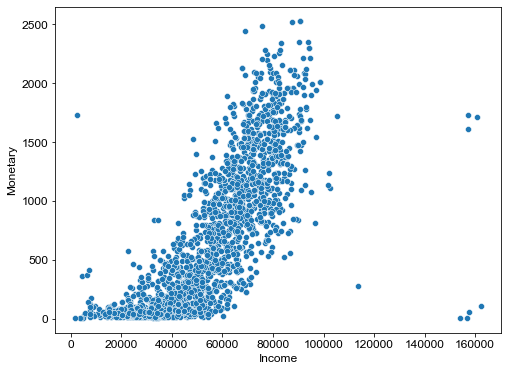

In [145]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Monetary')

یکی از نکات جالبی که وجود دارد، نحوه رفتار مشتریان در زمینه رابطه درآمد و مخارج آن ها است. در واقع رابطه نمایی که بین درآمد و مخارج وجود دارد به نحوی نشان دهنده این است که مشتریان آمادگی ذهنی و علاقه برای خرید را دارند و در صورتی که امکانات برای آن ها فراهم باشد تردید نخواهند کرد.

<AxesSubplot:>

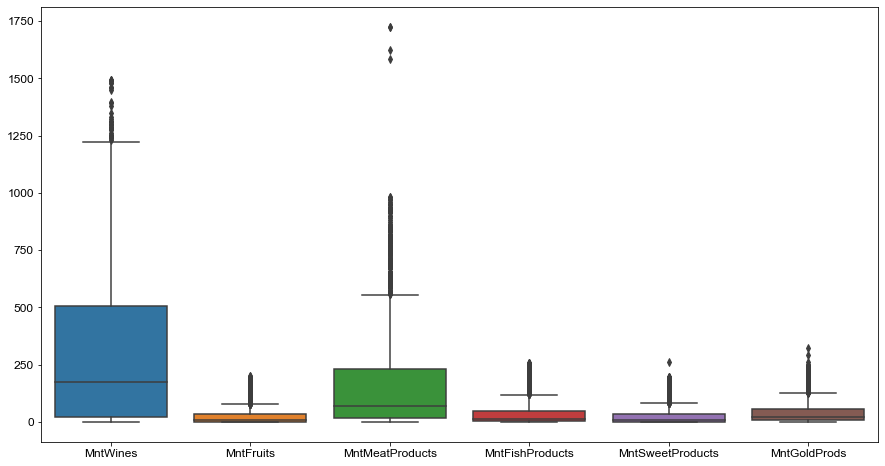

In [146]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:, 9:15])

همان طور که مشخص است بیشترین محصولاتی که در این فروشگاه مورد توجه مشتریان قرار میگیرد، محصولات گوشتی و شراب است که بیشترین توجه را در میان مشتریان به خود اختصاص داده اند

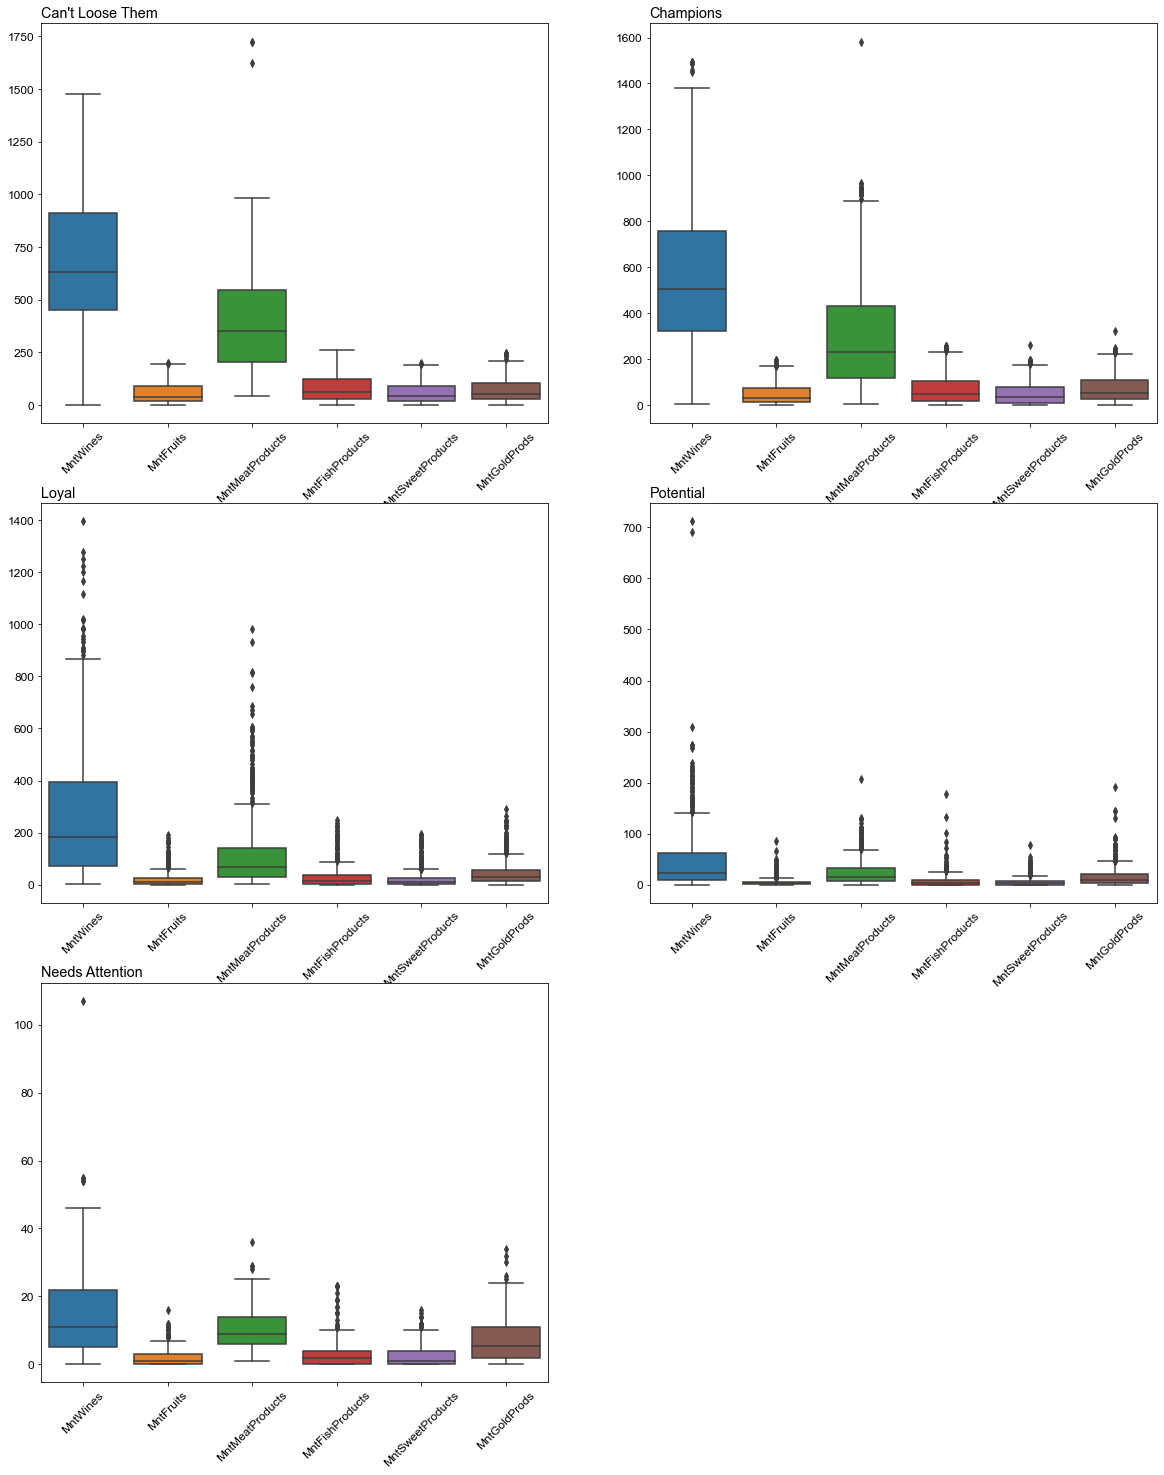

In [147]:
plt.figure(figsize=(20, 25))

for i, level in enumerate(df.RFM_Level.unique(), start=1):
    plt.subplot(3, 2, i)
    plt.title(level, loc='left')
    plt.xticks(rotation=45)
    sns.boxplot(data=df[df.RFM_Level == level].iloc[:, 9:15])


<AxesSubplot:>

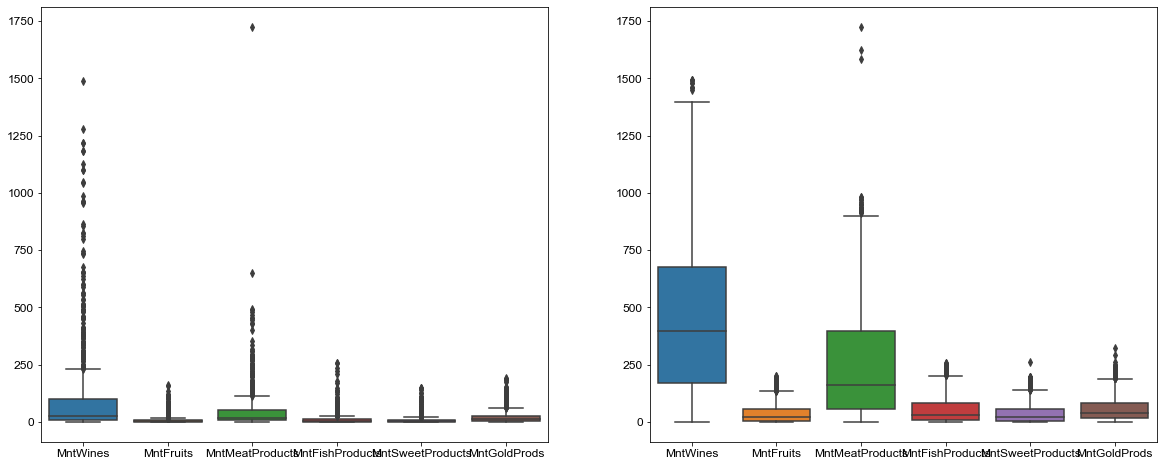

In [148]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.boxplot(data=df[df.Kids == 1].iloc[:, 9:15])
plt.subplot(122)
sns.boxplot(data=df[df.Kids == 0].iloc[:, 9:15])

میتوانیم مشاهده کنیم که الگوی مصرف محصولات در تمام طبقات جامعه مشتریان ما یکسان است حتی میان مشتریانی که بچه کوچک دارند و آن ها که ندارند نیز تفاوت چندانی در الگوی تقاضا برای محصولات مختلف دیده نمیشود

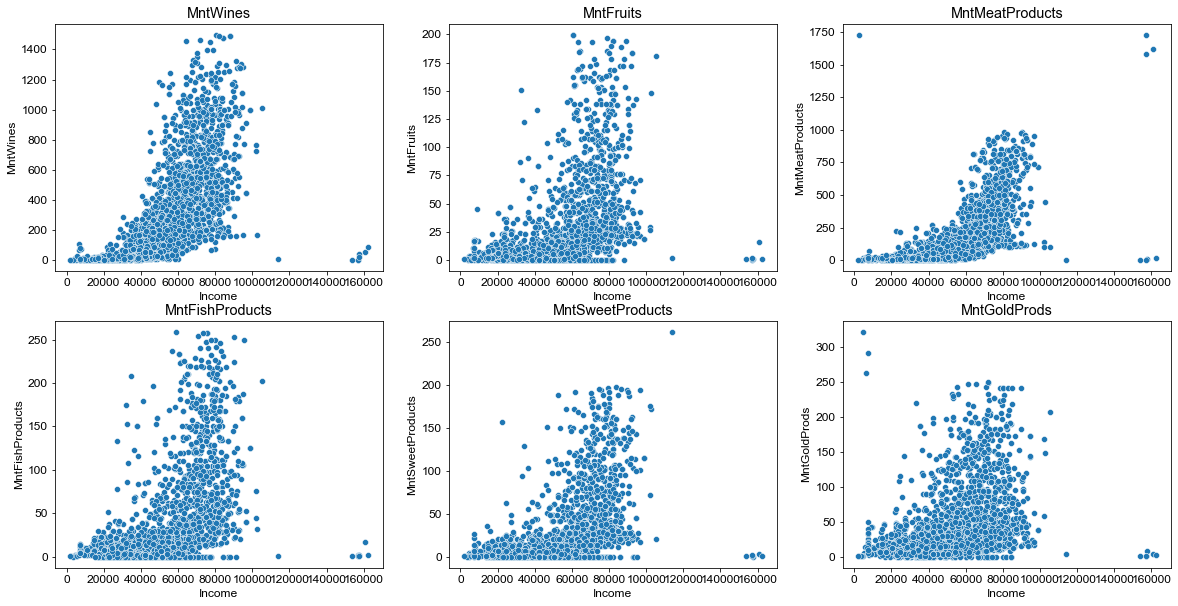

In [149]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.iloc[:, 9:15].columns, start=1):
    plt.subplot(2,3, i)
    plt.title(column)
    sns.scatterplot(data=df, x='Income', y=column)

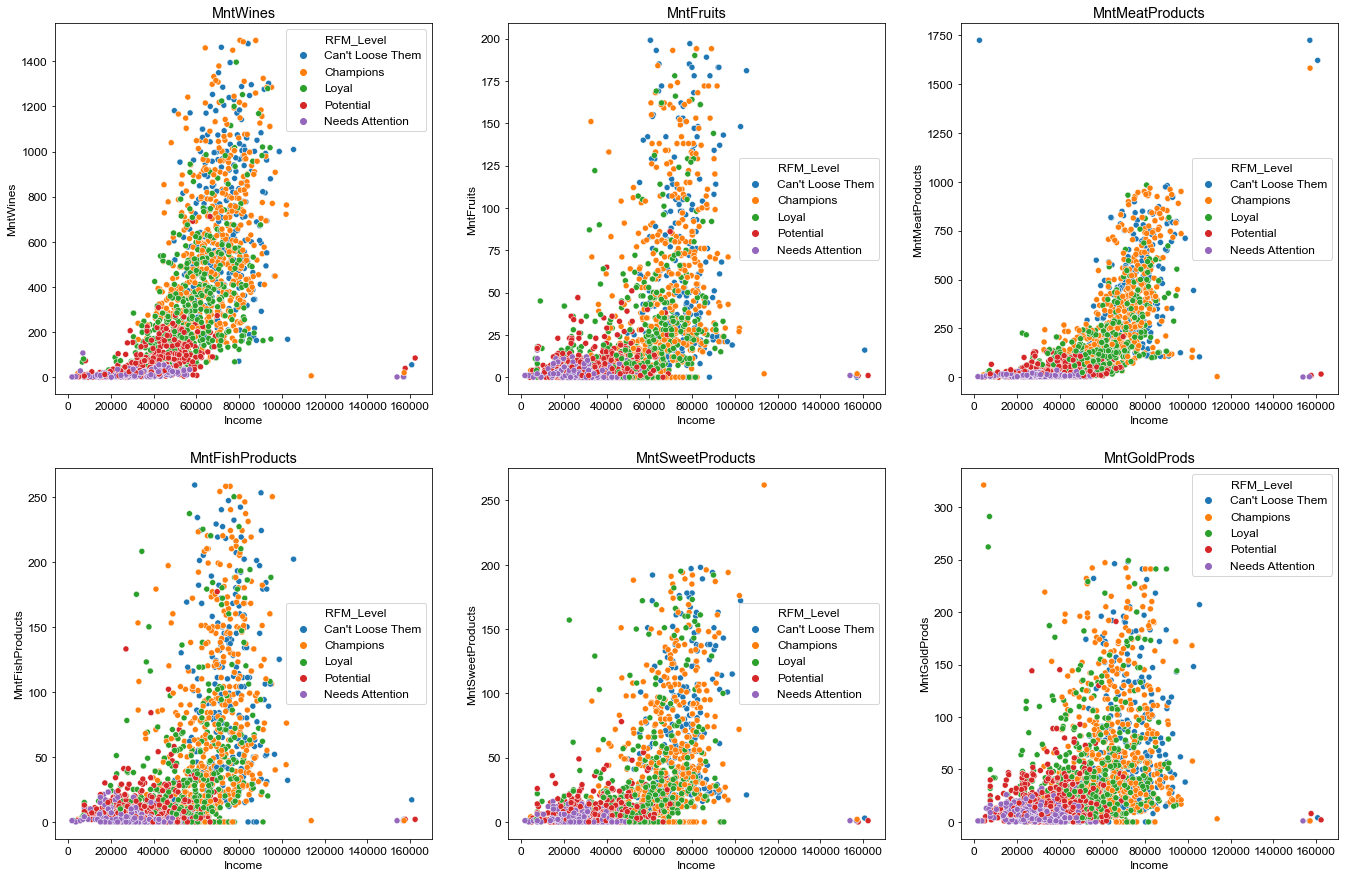

In [150]:
plt.figure(figsize=(23, 15))

for i, column in enumerate(df.iloc[:, 9:15].columns, start=1):
    plt.subplot(2,3, i)
    plt.title(column)
    sns.scatterplot(data=df, x='Income', y=column, hue='RFM_Level')

قابل تشخیص است که نمودارهای مصرف محصولات مختلف با توجه به درامد سالانه خانوار به ترتیب دسته بندی مشتریان تقسیم شده اند، مخصوصا در محصولات شراب و گوشت که مورد توجه عموم مشتریان قرار دارند، این تقسیم بندی وضوح بیشتری دارد

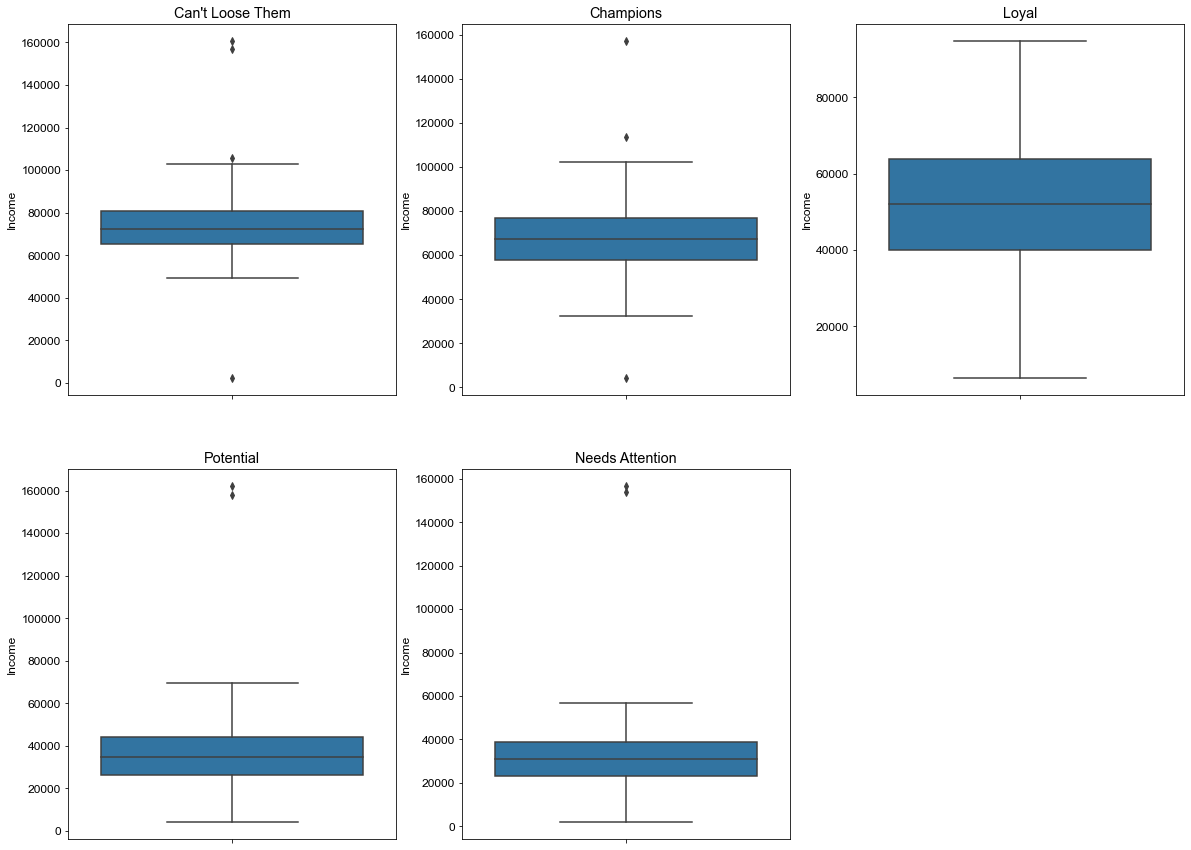

In [151]:
plt.figure(figsize=(20, 15))

for i, level in enumerate(df.RFM_Level.unique(), start=1):
    plt.subplot(2,3, i)
    plt.title(level)
    sns.boxplot(y=df[df.RFM_Level == level]['Income'])

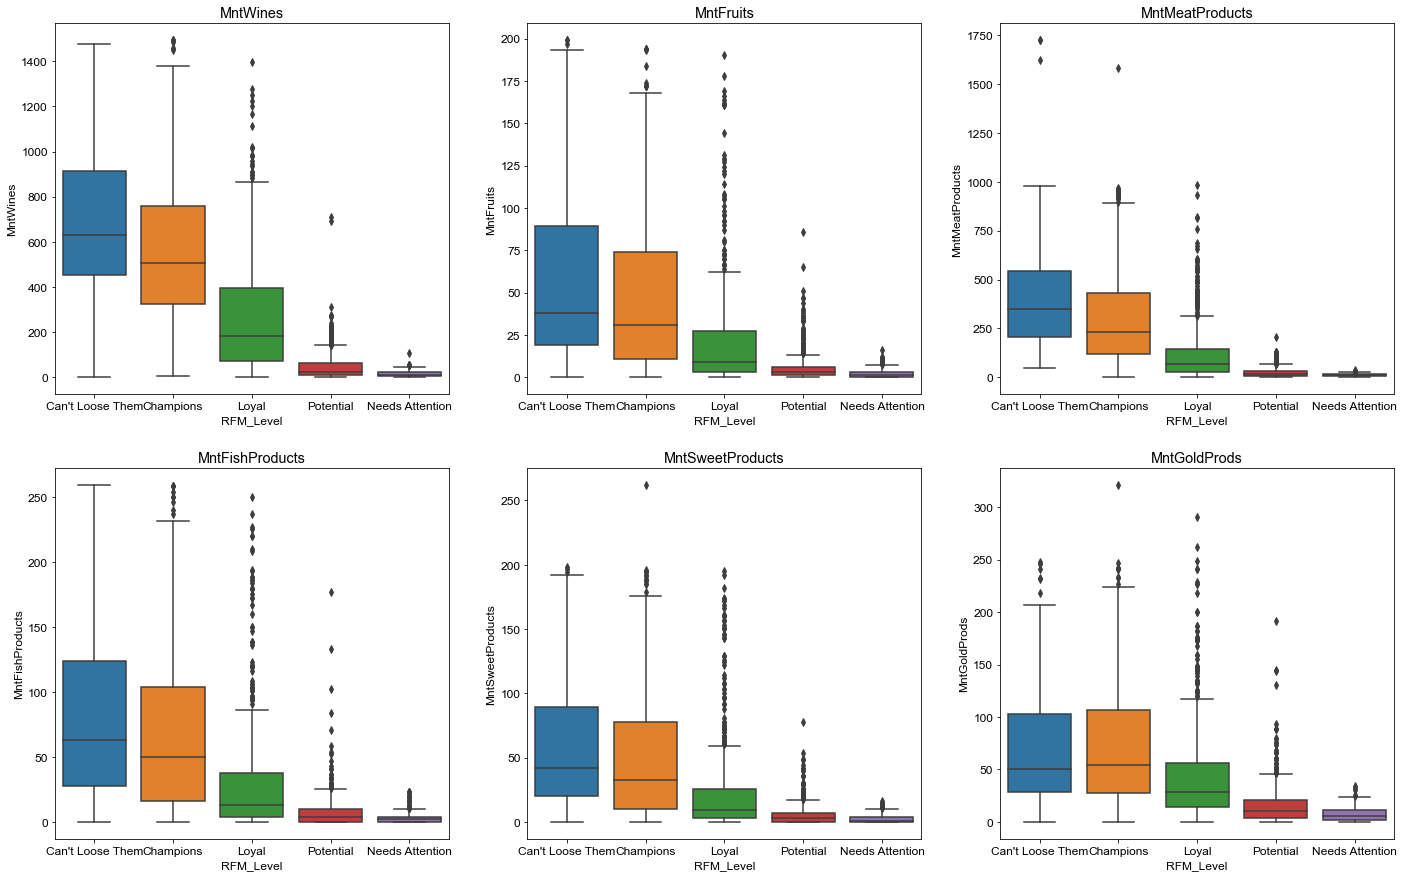

In [152]:
plt.figure(figsize=(24, 15))
for i, mnt in enumerate(df.iloc[:, 9:15].columns, start=1):
    plt.subplot(2, 3, i)
    plt.title(mnt)
    sns.boxplot(data=df, x='RFM_Level', y=mnt)

نوع مصرف هم املا تو گروه های مختلف مشتریان به ترتیبه 

<AxesSubplot:xlabel='RFM_Level', ylabel='NumDealsPurchases'>

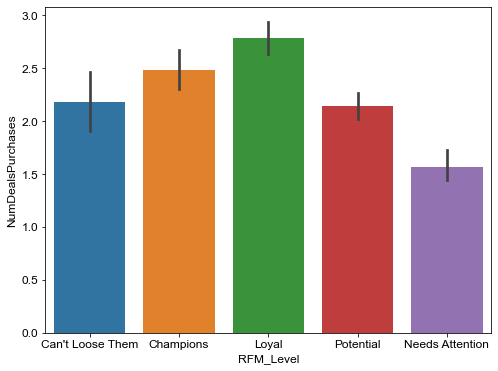

In [153]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='RFM_Level', y='NumDealsPurchases')

In [154]:
level_deals = df.groupby('RFM_Level').agg({
    'NumDealsPurchases': 'sum',
    'Frequency': 'sum'
}).reset_index()

level_deals['perc'] = (level_deals['NumDealsPurchases'] / level_deals['Frequency'] *100).round(2)
level_deals

,RFM_Level,NumDealsPurchases,Frequency,perc
0,Can't Loose Them,611,5927,10.31
1,Champions,1367,10480,13.04
2,Loyal,1522,6728,22.62
3,Needs Attention,402,1081,37.19
4,Potential,1236,3547,34.85


به هر حال تخفیف هم تاثیرگذار هست و بیشترین سطح توجه هم به این تخفیف ها از سمت گروه های پایینی مشتریان هست که حجم زیادی از خریدهای آن ها (بیش از 30 درصد) با تخفیف انجام شده

<AxesSubplot:>

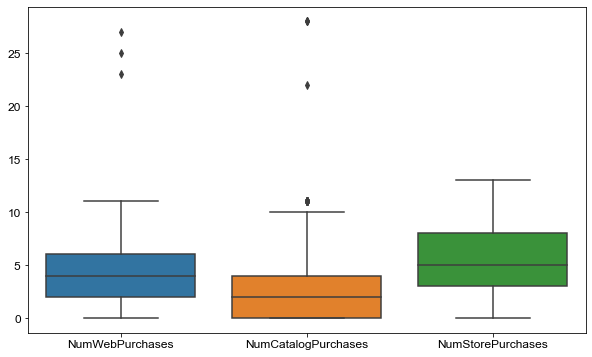

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 16:19])

In [196]:
rfm_purch = df.groupby('RFM_Level').agg({
    'NumWebPurchases': 'sum',
    'NumCatalogPurchases': 'sum',
    'NumStorePurchases': 'sum'
}).reset_index()

<AxesSubplot:xlabel='RFM_Level', ylabel='NumStorePurchases'>

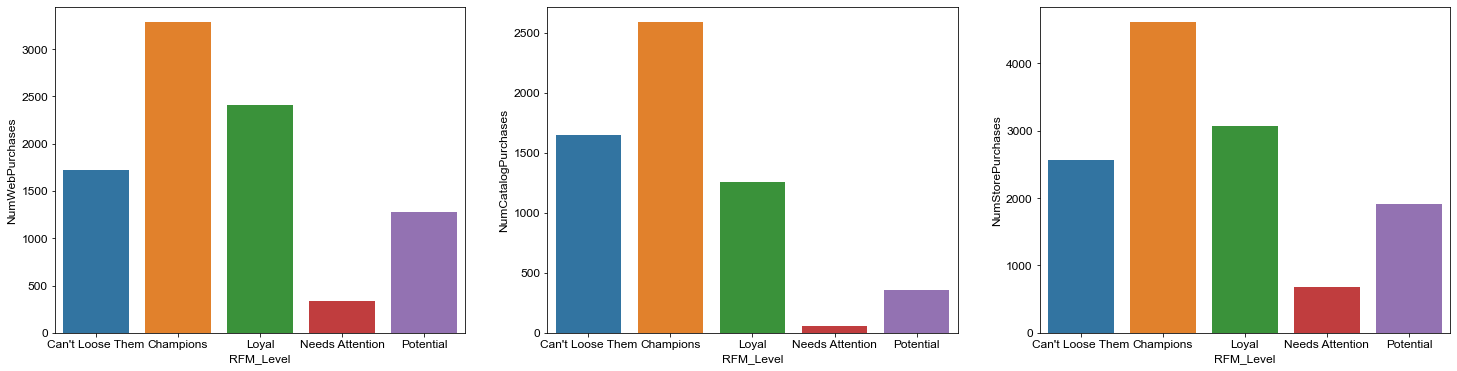

In [197]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
sns.barplot(data=rfm_purch, x='RFM_Level', y='NumWebPurchases')
plt.subplot(132)
sns.barplot(data=rfm_purch, x='RFM_Level', y='NumCatalogPurchases')
plt.subplot(133)
sns.barplot(data=rfm_purch, x='RFM_Level', y='NumStorePurchases')

در نمودار قابل توجه است که هر کدام از دسته های مشتریان از کدام کانال بیشتر از بقیه اقدام به خرید میکنند (به اندازه های نمودارها بر روی محور عمودی دقت کنید)

<AxesSubplot:>

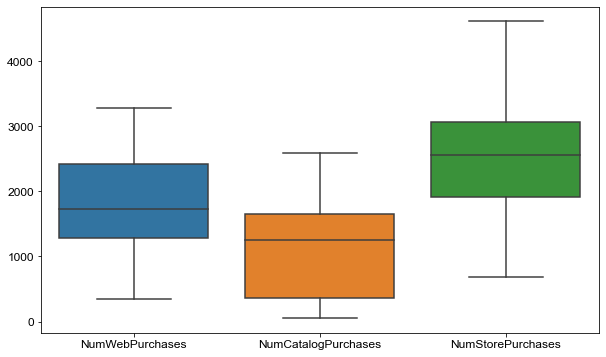

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.groupby('RFM_Level').agg({
                    'NumWebPurchases': 'sum',
                    'NumCatalogPurchases': 'sum',
                    'NumStorePurchases': 'sum'
                }).reset_index())

<AxesSubplot:xlabel='Income', ylabel='NumWebVisitsMonth'>

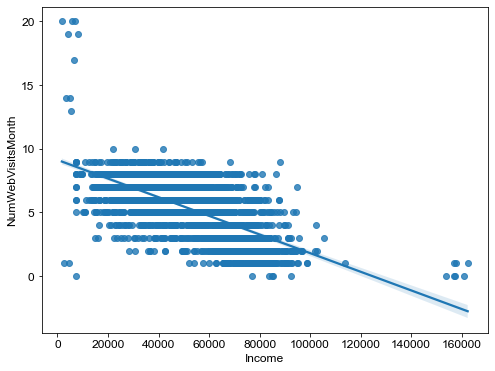

In [156]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Income', y='NumWebVisitsMonth')

<AxesSubplot:xlabel='Income', ylabel='NumWebPurchases'>

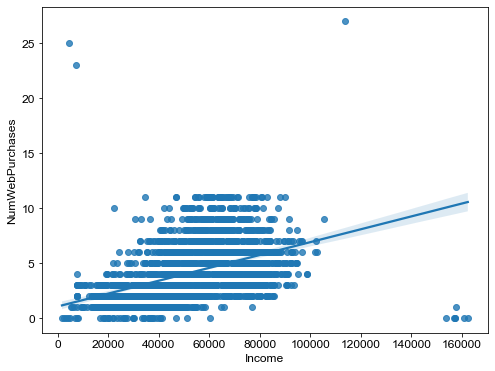

In [157]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Income', y='NumWebPurchases')

بیشترین میزان خرید از طریق خود فروشگاه به صورت حضوری بوده است و به طرز جالبی هر چقدر درامد سالانه کم میشود، میزان چک کردن وب سایت از سمت مشتریان افزایش میابد اما خریدها کاهش میابد، شاید این امر به دلیل این باشد که مشتریان بیشتر به دنبال بررسی فرصت های مناسب برای خرید هستند و این باعث میشود بیشتر به وب سایت سر بزنند

<AxesSubplot:xlabel='acc_cmp', ylabel='Age'>

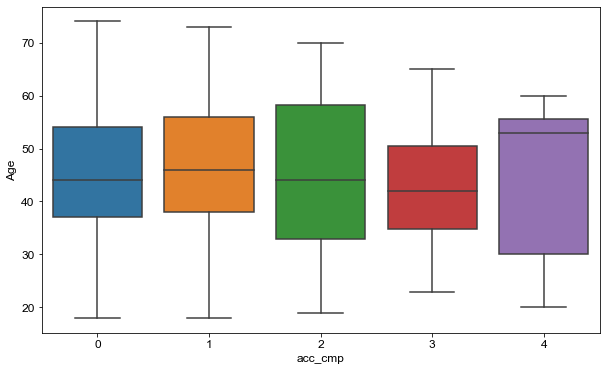

In [158]:
df['acc_cmp'] = df.iloc[:, 20:25].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='acc_cmp', y='Age')

طبق آنچه که مشاهدده میشود افراد با میانگین سنی بین 40 تا 50 سال بیشترین علاقه را به قبول کمپین ها داشته اند

<AxesSubplot:xlabel='acc_cmp', ylabel='Count'>

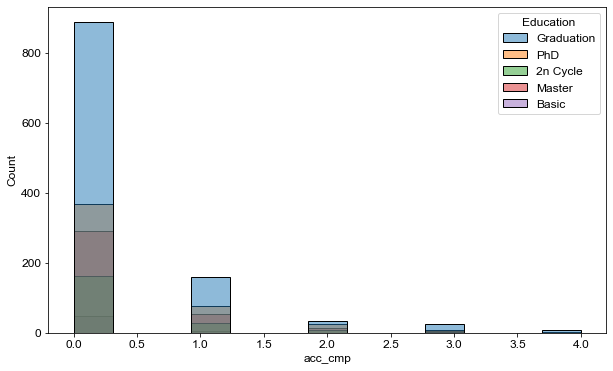

In [159]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='acc_cmp', hue='Education')

In [160]:
contingency_table = pd.crosstab(df.acc_cmp, df.Education) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

Education  2n Cycle  Basic  Graduation  Master  PhD
acc_cmp                                            
0               161     48         887     290  367
1                27      6         159      54   76
2                 7      0          34      13   26
3                 3      0          26       6    9
4                 0      0           8       1    2


Education,2n Cycle,Basic,Graduation,Master,PhD
acc_cmp,,,,,
0,0.813131,0.888889,0.796230,0.796703,0.764583
1,0.136364,0.111111,0.142729,0.148352,0.158333
2,0.035354,0.000000,0.030521,0.035714,0.054167
3,0.015152,0.000000,0.023339,0.016484,0.018750
4,0.000000,0.000000,0.007181,0.002747,0.004167


In [161]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Education  2n Cycle  Basic  Graduation  Master  PhD
acc_cmp                                            
0               161     48         887     290  367
1                27      6         159      54   76
2                 7      0          34      13   26
3                 3      0          26       6    9
4                 0      0           8       1    2
dof=16
[[1.57056109e+02 4.28334842e+01 8.83638914e+02 2.88729412e+02
  3.80742081e+02]
 [2.88488688e+01 7.86787330e+00 1.62311312e+02 5.30352941e+01
  6.99366516e+01]
 [7.16742081e+00 1.95475113e+00 4.03257919e+01 1.31764706e+01
  1.73755656e+01]
 [3.94208145e+00 1.07511312e+00 2.21791855e+01 7.24705882e+00
  9.55656109e+00]
 [9.85520362e-01 2.68778281e-01 5.54479638e+00 1.81176471e+00
  2.38914027e+00]]
probability=0.950, critical=26.296, stat=14.617
Independent (fail to reject H0)
significance=0.050, p=0.553
Independent (fail to reject H0)


<AxesSubplot:xlabel='acc_cmp', ylabel='Count'>

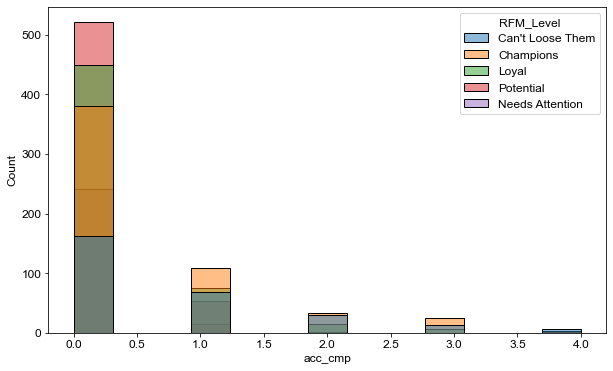

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='acc_cmp', hue='RFM_Level')

In [163]:
contingency_table = pd.crosstab(df.acc_cmp, df.RFM_Level) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

RFM_Level  Can't Loose Them  Champions  Loyal  Needs Attention  Potential
acc_cmp                                                                  
0                       162        380    449              241        521
1                        69        109     75               15         54
2                        30         34     14                0          2
3                        13         25      6                0          0
4                         6          3      2                0          0


RFM_Level,Can't Loose Them,Champions,Loyal,Needs Attention,Potential
acc_cmp,,,,,
0,0.578571,0.689655,0.822344,0.941406,0.902946
1,0.246429,0.197822,0.137363,0.058594,0.093588
2,0.107143,0.061706,0.025641,0.000000,0.003466
3,0.046429,0.045372,0.010989,0.000000,0.000000
4,0.021429,0.005445,0.003663,0.000000,0.000000


In [164]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

RFM_Level  Can't Loose Them  Champions  Loyal  Needs Attention  Potential
acc_cmp                                                                  
0                       162        380    449              241        521
1                        69        109     75               15         54
2                        30         34     14                0          2
3                        13         25      6                0          0
4                         6          3      2                0          0
dof=16
[[222.09954751 437.060181   433.09411765 203.06244344 457.68371041]
 [ 40.79638009  80.28144796  79.55294118  37.29954751  84.06968326]
 [ 10.13574661  19.94570136  19.76470588   9.26696833  20.88687783]
 [  5.57466063  10.97013575  10.87058824   5.09683258  11.48778281]
 [  1.39366516   2.74253394   2.71764706   1.27420814   2.8719457 ]]
probability=0.950, critical=26.296, stat=237.307
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


<AxesSubplot:xlabel='acc_cmp', ylabel='Count'>

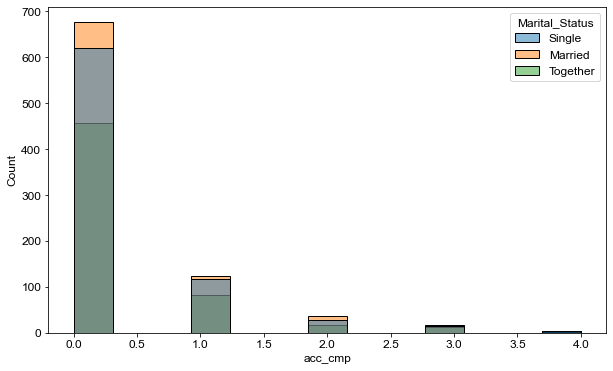

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='acc_cmp', hue='Marital_Status')

In [166]:
contingency_table = pd.crosstab(df.acc_cmp, df.Marital_Status) #Contingency Table
print(contingency_table)
contingency_table.apply(lambda r:r/r.sum(),axis=0)

Marital_Status  Married  Single  Together
acc_cmp                                  
0                   676     620       457
1                   124     116        82
2                    37      27        16
3                    18      14        12
4                     2       5         4


Marital_Status,Married,Single,Together
acc_cmp,,,
0,0.788798,0.792839,0.800350
1,0.144691,0.148338,0.143608
2,0.043174,0.034527,0.028021
3,0.021004,0.017903,0.021016
4,0.002334,0.006394,0.007005


In [167]:
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Marital_Status  Married  Single  Together
acc_cmp                                  
0                   676     620       457
1                   124     116        82
2                    37      27        16
3                    18      14        12
4                     2       5         4
dof=8
[[679.78325792 620.29230769 452.92443439]
 [124.86606335 113.93846154  83.19547511]
 [ 31.02262443  28.30769231  20.66968326]
 [ 17.06244344  15.56923077  11.36832579]
 [  4.26561086   3.89230769   2.84208145]]
probability=0.950, critical=15.507, stat=4.621
Independent (fail to reject H0)
significance=0.050, p=0.797
Independent (fail to reject H0)


طبق تست های صورت گرفته نیز، تحصیلات و وضع تاهل تاثیر رابطه خاصی با قبول کردن کمپین ها از سمت مشتریان ندارد اما با سطح مشتریان مرتبط است

In [168]:
df.iloc[:, 20:26]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,0,0,0,0,1
1,0,0,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,0,0,0
2237,0,0,0,0,0,0
2238,0,0,0,0,0,0


In [169]:
cmp_level = df.groupby('RFM_Level').sum().reset_index()

In [170]:
cmp_level.iloc[:, 18:24].columns

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'],
      dtype='object')

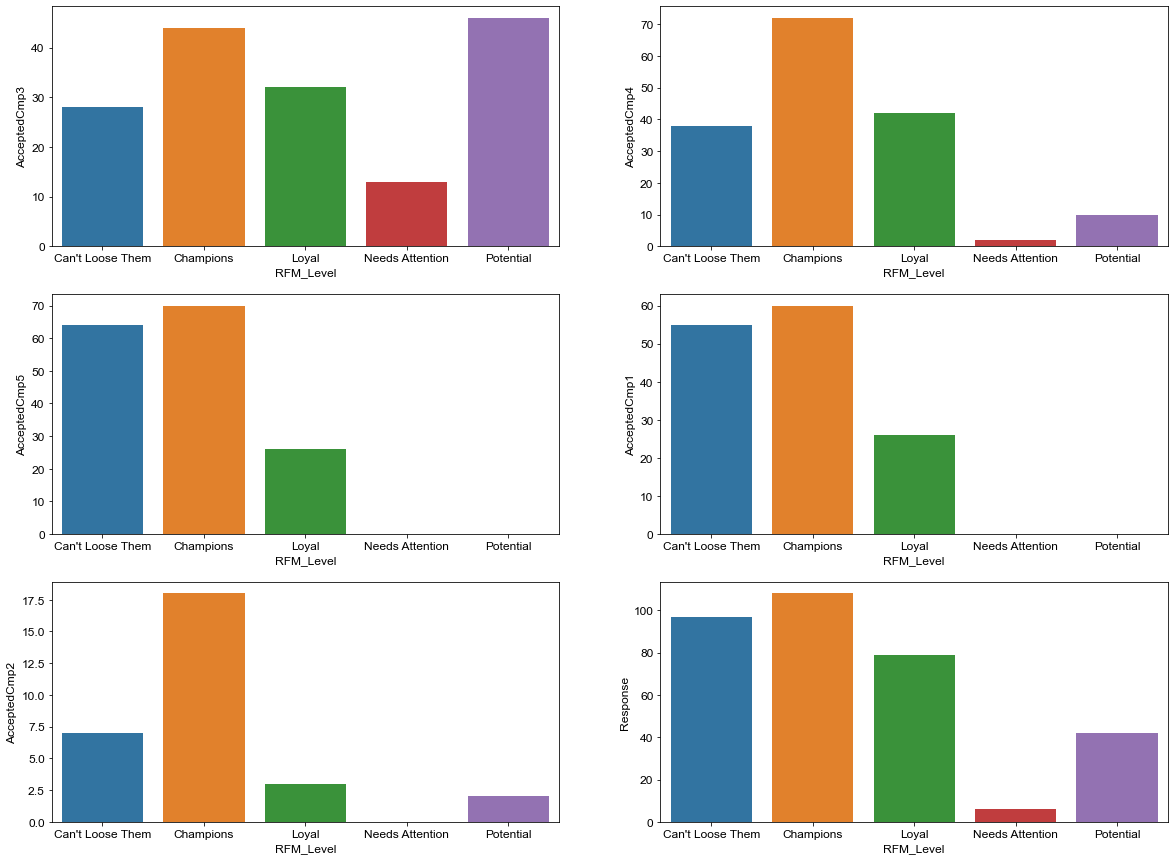

In [171]:
plt.figure(figsize=(20, 15))

for i, cmp in enumerate(cmp_level.iloc[:, 18:24].columns, start=1):
    plt.subplot(3, 2, i)
    sns.barplot(data=cmp_level, x='RFM_Level', y=cmp)

<AxesSubplot:xlabel='participation', ylabel='campaign'>

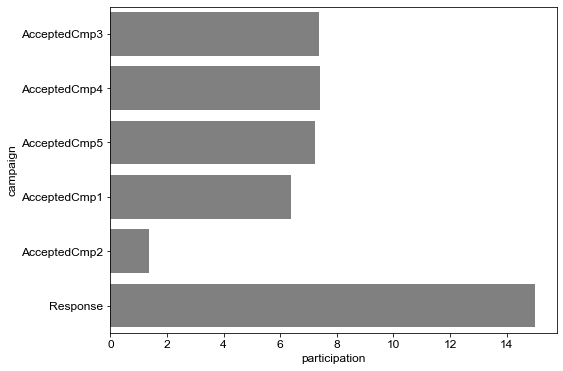

In [172]:
cmp_participate = pd.DataFrame(df.iloc[:, 20:26].sum() / df['ID'].nunique() *100).reset_index().rename(columns={'index': 'campaign', 0:'participation'})

plt.figure(figsize=(8, 6))
sns.barplot(data=cmp_participate, y='campaign', x='participation', color='grey')

با اینکه از لحاظ مشارکت، کمپین آخر بیشترین میزان مشارکت را به خود دیده استاما این کمپین ها بیشترین مشتریان را از سه گروه بالایی جذب میکند و این مسئله میتواند با تدابیری تغییر کند تا همه سطوحخ مشتریان جذب شوند